In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((13*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((13*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(70, 100, 100)


In [17]:
print(y_test.shape)

(8, 100, 100)


In [18]:
print(x_train.shape)

(70, 15, 1)


In [19]:
print(x_test.shape)

(8, 15, 1)


In [20]:
theta_train.shape

(70,)

In [21]:
tsr_train.shape

(70,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((70, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((8, 2, 1))

In [28]:
tsr_theta_train.shape

(70, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 6ms/step - loss: 0.0349 - rmse: 0.1868
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0310 - rmse: 0.1759
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0283 - rmse: 0.1683
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0264 - rmse: 0.1623
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.1547
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0238 - rmse: 0.1544
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0238 - rmse: 0.1544
Epoch 10/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0239 - rmse: 0.1546
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 89/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 90/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 92/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0224 - rmse: 0.1495
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0223 - rmse: 0.1495
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1495
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0224 - rmse: 0.1495
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1492
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1491
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0222 - rmse: 0.1491
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1490
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1451
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1450
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1450
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0203 - rmse: 0.1426
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0204 - rmse: 0.1430
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.1427
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1427
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1426
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1427
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.1428
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.1427
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1401
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1401
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1355
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0144 - rmse: 0.1201
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1203
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1181
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1089
Epoch 759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - rmse: 0.1088
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.1083
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.1078
Epoch 763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.1089
Epoch 766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1064
Epoch 767/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0950
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0949
Epoch 848/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0090 - rmse: 0.0951
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 850/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0942
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0945
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 929/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1012/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 1013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1015/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 1018/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 1094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 1096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0682
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1265/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1267/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 1343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 1350/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 1429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 1432/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 1434/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 1593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 1594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1601/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 9.5096e-04 - rmse: 0.0308
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2539e-04 - rmse: 0.0304
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2932e-04 - rmse: 0.0305
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2862e-04 - rmse: 0.0305
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2693e-04 - rmse: 0.0304
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2083e-04 - rmse: 0.0303
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2263e-04 - rmse: 0.0304
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1231e-04 - rmse: 0.0302
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1069e-04 - rmse: 0.0302
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0063e-04 - rmse: 0.03

2/2 [==============================] - 0s 4ms/step - loss: 7.1962e-04 - rmse: 0.0268
Epoch 1755/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1187e-04 - rmse: 0.0267
Epoch 1756/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1702e-04 - rmse: 0.0268
Epoch 1757/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1990e-04 - rmse: 0.0268
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0676e-04 - rmse: 0.0266
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0589e-04 - rmse: 0.0266
Epoch 1760/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1979e-04 - rmse: 0.0268
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3369e-04 - rmse: 0.0271
Epoch 1762/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1845e-04 - rmse: 0.0268
Epoch 1763/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0408e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 5.8517e-04 - rmse: 0.0242
Epoch 1835/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9207e-04 - rmse: 0.0243
Epoch 1836/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7686e-04 - rmse: 0.0240
Epoch 1837/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6793e-04 - rmse: 0.0238
Epoch 1838/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6655e-04 - rmse: 0.0238
Epoch 1839/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8281e-04 - rmse: 0.0241
Epoch 1840/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6878e-04 - rmse: 0.0238
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6473e-04 - rmse: 0.0238
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5398e-04 - rmse: 0.0235
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7366e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.5634e-04 - rmse: 0.0214
Epoch 1915/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5853e-04 - rmse: 0.0214
Epoch 1916/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6647e-04 - rmse: 0.0216
Epoch 1917/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4212e-04 - rmse: 0.0210
Epoch 1918/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4080e-04 - rmse: 0.0210
Epoch 1919/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3388e-04 - rmse: 0.0208
Epoch 1920/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3205e-04 - rmse: 0.0208
Epoch 1921/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2589e-04 - rmse: 0.0206
Epoch 1922/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2722e-04 - rmse: 0.0207
Epoch 1923/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2331e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.6150e-04 - rmse: 0.0190
Epoch 1995/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5498e-04 - rmse: 0.0188
Epoch 1996/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5927e-04 - rmse: 0.0190
Epoch 1997/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4496e-04 - rmse: 0.0186
Epoch 1998/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4488e-04 - rmse: 0.0186
Epoch 1999/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4625e-04 - rmse: 0.0186
Epoch 2000/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4371e-04 - rmse: 0.0185
Epoch 2001/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4686e-04 - rmse: 0.0186
Epoch 2002/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4042e-04 - rmse: 0.0185
Epoch 2003/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3814e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 2.7328e-04 - rmse: 0.0165
Epoch 2075/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8004e-04 - rmse: 0.0167
Epoch 2076/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7600e-04 - rmse: 0.0166
Epoch 2077/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7739e-04 - rmse: 0.0167
Epoch 2078/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8102e-04 - rmse: 0.0168
Epoch 2079/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7852e-04 - rmse: 0.0167
Epoch 2080/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8233e-04 - rmse: 0.0168
Epoch 2081/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8606e-04 - rmse: 0.0169
Epoch 2082/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9769e-04 - rmse: 0.0173
Epoch 2083/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0298e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.3194e-04 - rmse: 0.0152
Epoch 2155/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2564e-04 - rmse: 0.0150
Epoch 2156/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2906e-04 - rmse: 0.0151
Epoch 2157/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2274e-04 - rmse: 0.0149
Epoch 2158/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2504e-04 - rmse: 0.0150
Epoch 2159/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2296e-04 - rmse: 0.0149
Epoch 2160/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2265e-04 - rmse: 0.0149
Epoch 2161/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2337e-04 - rmse: 0.0149
Epoch 2162/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1850e-04 - rmse: 0.0148
Epoch 2163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2011e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.9719e-04 - rmse: 0.0140
Epoch 2235/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9449e-04 - rmse: 0.0139
Epoch 2236/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9297e-04 - rmse: 0.0139
Epoch 2237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8833e-04 - rmse: 0.0137
Epoch 2238/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9034e-04 - rmse: 0.0138
Epoch 2239/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8844e-04 - rmse: 0.0137
Epoch 2240/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8266e-04 - rmse: 0.0135
Epoch 2241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8381e-04 - rmse: 0.0136
Epoch 2242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8374e-04 - rmse: 0.0136
Epoch 2243/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7941e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.5679e-04 - rmse: 0.0125
Epoch 2315/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5742e-04 - rmse: 0.0125
Epoch 2316/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5318e-04 - rmse: 0.0124
Epoch 2317/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5643e-04 - rmse: 0.0125
Epoch 2318/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5906e-04 - rmse: 0.0126
Epoch 2319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5820e-04 - rmse: 0.0126
Epoch 2320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6034e-04 - rmse: 0.0127
Epoch 2321/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5241e-04 - rmse: 0.0123
Epoch 2322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6051e-04 - rmse: 0.0127
Epoch 2323/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5156e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 1.3311e-04 - rmse: 0.0115
Epoch 2395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3860e-04 - rmse: 0.0118
Epoch 2396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3575e-04 - rmse: 0.0117
Epoch 2397/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3303e-04 - rmse: 0.0115
Epoch 2398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3725e-04 - rmse: 0.0117
Epoch 2399/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3844e-04 - rmse: 0.0118
Epoch 2400/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4575e-04 - rmse: 0.0121
Epoch 2401/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3540e-04 - rmse: 0.0116
Epoch 2402/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3352e-04 - rmse: 0.0116
Epoch 2403/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3700e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.0873e-04 - rmse: 0.0104
Epoch 2475/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1237e-04 - rmse: 0.0106
Epoch 2476/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0845e-04 - rmse: 0.0104
Epoch 2477/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1144e-04 - rmse: 0.0106
Epoch 2478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0853e-04 - rmse: 0.0104
Epoch 2479/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0587e-04 - rmse: 0.0103
Epoch 2480/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0918e-04 - rmse: 0.0104
Epoch 2481/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0866e-04 - rmse: 0.0104
Epoch 2482/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0388e-04 - rmse: 0.0102
Epoch 2483/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1083e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 9.5721e-05 - rmse: 0.0098
Epoch 2555/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4555e-05 - rmse: 0.0097
Epoch 2556/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1460e-05 - rmse: 0.0096
Epoch 2557/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0018e-05 - rmse: 0.0095
Epoch 2558/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2655e-05 - rmse: 0.0096
Epoch 2559/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1938e-05 - rmse: 0.0096
Epoch 2560/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9793e-05 - rmse: 0.0095
Epoch 2561/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7033e-05 - rmse: 0.0099
Epoch 2562/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5253e-05 - rmse: 0.0098
Epoch 2563/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6168e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.8068e-05 - rmse: 0.0094
Epoch 2635/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6288e-05 - rmse: 0.0093
Epoch 2636/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1712e-05 - rmse: 0.0090
Epoch 2637/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7377e-05 - rmse: 0.0093
Epoch 2638/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2820e-05 - rmse: 0.0091
Epoch 2639/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1269e-05 - rmse: 0.0090
Epoch 2640/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0596e-05 - rmse: 0.0095
Epoch 2641/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1185e-05 - rmse: 0.0090
Epoch 2642/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2003e-05 - rmse: 0.0091
Epoch 2643/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2629e-05 - rmse: 0.0

2/2 [==============================] - 0s 3ms/step - loss: 9.1216e-05 - rmse: 0.0096
Epoch 2715/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7082e-05 - rmse: 0.0099
Epoch 2716/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9260e-05 - rmse: 0.0094
Epoch 2717/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5506e-05 - rmse: 0.0092
Epoch 2718/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4339e-05 - rmse: 0.0092
Epoch 2719/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0876e-05 - rmse: 0.0090
Epoch 2720/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1301e-05 - rmse: 0.0090
Epoch 2721/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3583e-05 - rmse: 0.0091
Epoch 2722/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1390e-05 - rmse: 0.0096
Epoch 2723/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8536e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.5093e-05 - rmse: 0.0092
Epoch 2795/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1802e-05 - rmse: 0.0096
Epoch 2796/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1047e-04 - rmse: 0.0105
Epoch 2797/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0732e-04 - rmse: 0.0104
Epoch 2798/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7612e-05 - rmse: 0.0099
Epoch 2799/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4668e-05 - rmse: 0.0092
Epoch 2800/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7153e-05 - rmse: 0.0093
Epoch 2801/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9232e-05 - rmse: 0.0094
Epoch 2802/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0616e-04 - rmse: 0.0103
Epoch 2803/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0507e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 5.5288e-05 - rmse: 0.0074
Epoch 2875/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8877e-05 - rmse: 0.0077
Epoch 2876/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7345e-05 - rmse: 0.0076
Epoch 2877/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9926e-05 - rmse: 0.0077
Epoch 2878/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5518e-05 - rmse: 0.0075
Epoch 2879/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6152e-05 - rmse: 0.0075
Epoch 2880/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5712e-05 - rmse: 0.0075
Epoch 2881/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3748e-05 - rmse: 0.0073
Epoch 2882/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6468e-05 - rmse: 0.0075
Epoch 2883/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7331e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.5630e-05 - rmse: 0.0081
Epoch 2955/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1403e-05 - rmse: 0.0085
Epoch 2956/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5760e-05 - rmse: 0.0075
Epoch 2957/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4668e-05 - rmse: 0.0074
Epoch 2958/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7743e-05 - rmse: 0.0076
Epoch 2959/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2586e-05 - rmse: 0.0079
Epoch 2960/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8627e-05 - rmse: 0.0089
Epoch 2961/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6845e-05 - rmse: 0.0082
Epoch 2962/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9084e-05 - rmse: 0.0077
Epoch 2963/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0112e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.9742e-05 - rmse: 0.0077
Epoch 3035/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8478e-05 - rmse: 0.0076
Epoch 3036/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8675e-05 - rmse: 0.0070
Epoch 3037/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2292e-05 - rmse: 0.0072
Epoch 3038/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0516e-05 - rmse: 0.0071
Epoch 3039/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2384e-05 - rmse: 0.0072
Epoch 3040/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0842e-05 - rmse: 0.0071
Epoch 3041/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0277e-05 - rmse: 0.0071
Epoch 3042/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6285e-05 - rmse: 0.0068
Epoch 3043/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.5466e-05 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 3.6894e-05 - rmse: 0.0061
Epoch 3115/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4917e-05 - rmse: 0.0059
Epoch 3116/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5663e-05 - rmse: 0.0060
Epoch 3117/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5031e-05 - rmse: 0.0059
Epoch 3118/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4856e-05 - rmse: 0.0059
Epoch 3119/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4919e-05 - rmse: 0.0059
Epoch 3120/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5726e-05 - rmse: 0.0060
Epoch 3121/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4621e-05 - rmse: 0.0059
Epoch 3122/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5926e-05 - rmse: 0.0060
Epoch 3123/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7313e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.3322e-05 - rmse: 0.0058
Epoch 3195/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3074e-05 - rmse: 0.0058
Epoch 3196/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2534e-05 - rmse: 0.0057
Epoch 3197/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2122e-05 - rmse: 0.0057
Epoch 3198/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2871e-05 - rmse: 0.0057
Epoch 3199/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4844e-05 - rmse: 0.0059
Epoch 3200/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8183e-05 - rmse: 0.0062
Epoch 3201/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5741e-05 - rmse: 0.0068
Epoch 3202/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6289e-05 - rmse: 0.0068
Epoch 3203/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0417e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.2448e-05 - rmse: 0.0085
Epoch 3275/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3705e-05 - rmse: 0.0073
Epoch 3276/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2624e-05 - rmse: 0.0079
Epoch 3277/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6481e-05 - rmse: 0.0068
Epoch 3278/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2847e-05 - rmse: 0.0073
Epoch 3279/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5987e-05 - rmse: 0.0075
Epoch 3280/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2151e-05 - rmse: 0.0079
Epoch 3281/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1883e-05 - rmse: 0.0072
Epoch 3282/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1230e-05 - rmse: 0.0072
Epoch 3283/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4785e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.7283e-05 - rmse: 0.0061
Epoch 3355/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6841e-05 - rmse: 0.0061
Epoch 3356/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8074e-05 - rmse: 0.0062
Epoch 3357/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4439e-05 - rmse: 0.0059
Epoch 3358/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0195e-05 - rmse: 0.0063
Epoch 3359/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5334e-05 - rmse: 0.0059
Epoch 3360/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9054e-05 - rmse: 0.0054
Epoch 3361/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0628e-05 - rmse: 0.0055
Epoch 3362/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3342e-05 - rmse: 0.0058
Epoch 3363/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8909e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.7104e-05 - rmse: 0.0061
Epoch 3435/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7383e-05 - rmse: 0.0061
Epoch 3436/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3820e-05 - rmse: 0.0058
Epoch 3437/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3707e-05 - rmse: 0.0066
Epoch 3438/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4428e-05 - rmse: 0.0074
Epoch 3439/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9168e-05 - rmse: 0.0070
Epoch 3440/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5884e-05 - rmse: 0.0075
Epoch 3441/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4614e-05 - rmse: 0.0074
Epoch 3442/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0056e-05 - rmse: 0.0071
Epoch 3443/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8070e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.5283e-05 - rmse: 0.0050
Epoch 3515/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5718e-05 - rmse: 0.0051
Epoch 3516/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4167e-05 - rmse: 0.0049
Epoch 3517/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7616e-05 - rmse: 0.0053
Epoch 3518/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4578e-05 - rmse: 0.0050
Epoch 3519/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4753e-05 - rmse: 0.0050
Epoch 3520/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4495e-05 - rmse: 0.0049
Epoch 3521/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3931e-05 - rmse: 0.0049
Epoch 3522/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4489e-05 - rmse: 0.0049
Epoch 3523/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7274e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.7621e-05 - rmse: 0.0053
Epoch 3595/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7653e-05 - rmse: 0.0053
Epoch 3596/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2085e-05 - rmse: 0.0065
Epoch 3597/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3055e-05 - rmse: 0.0066
Epoch 3598/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5463e-05 - rmse: 0.0060
Epoch 3599/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2196e-05 - rmse: 0.0057
Epoch 3600/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5099e-05 - rmse: 0.0067
Epoch 3601/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8529e-05 - rmse: 0.0053
Epoch 3602/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8990e-05 - rmse: 0.0062
Epoch 3603/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7514e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2910e-05 - rmse: 0.0057
Epoch 3675/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1431e-05 - rmse: 0.0056
Epoch 3676/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5853e-05 - rmse: 0.0051
Epoch 3677/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2487e-05 - rmse: 0.0047
Epoch 3678/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2818e-05 - rmse: 0.0048
Epoch 3679/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3588e-05 - rmse: 0.0049
Epoch 3680/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3211e-05 - rmse: 0.0048
Epoch 3681/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2119e-05 - rmse: 0.0047
Epoch 3682/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7903e-05 - rmse: 0.0053
Epoch 3683/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8377e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.0945e-05 - rmse: 0.0078
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7378e-05 - rmse: 0.0082
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0481e-05 - rmse: 0.0078
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2229e-05 - rmse: 0.0065
Epoch 3758/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3289e-05 - rmse: 0.0066
Epoch 3759/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5966e-05 - rmse: 0.0068
Epoch 3760/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4393e-05 - rmse: 0.0059
Epoch 3761/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0625e-05 - rmse: 0.0064
Epoch 3762/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9743e-05 - rmse: 0.0071
Epoch 3763/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0067e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9687e-05 - rmse: 0.0044
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9517e-05 - rmse: 0.0044
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8778e-05 - rmse: 0.0043
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9196e-05 - rmse: 0.0044
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8274e-05 - rmse: 0.0043
Epoch 3839/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1835e-05 - rmse: 0.0047
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0445e-05 - rmse: 0.0045
Epoch 3841/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9222e-05 - rmse: 0.0054
Epoch 3842/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4725e-05 - rmse: 0.0059
Epoch 3843/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4640e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.8667e-05 - rmse: 0.0054
Epoch 3915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9555e-05 - rmse: 0.0044
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0237e-05 - rmse: 0.0045
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4516e-05 - rmse: 0.0050
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6388e-05 - rmse: 0.0051
Epoch 3919/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2920e-05 - rmse: 0.0048
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2317e-05 - rmse: 0.0047
Epoch 3921/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7156e-05 - rmse: 0.0052
Epoch 3922/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9550e-05 - rmse: 0.0044
Epoch 3923/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9293e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.5177e-05 - rmse: 0.0039
Epoch 3995/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6156e-05 - rmse: 0.0040
Epoch 3996/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9437e-05 - rmse: 0.0044
Epoch 3997/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6371e-05 - rmse: 0.0040
Epoch 3998/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4939e-05 - rmse: 0.0050
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4854e-05 - rmse: 0.0050
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6305e-05 - rmse: 0.0051
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9292e-05 - rmse: 0.0054
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8745e-05 - rmse: 0.0043
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7145e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.7165e-05 - rmse: 0.0061
Epoch 4075/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5698e-05 - rmse: 0.0060
Epoch 4076/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5065e-05 - rmse: 0.0059
Epoch 4077/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4552e-05 - rmse: 0.0050
Epoch 4078/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3484e-05 - rmse: 0.0048
Epoch 4079/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1668e-05 - rmse: 0.0047
Epoch 4080/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3568e-05 - rmse: 0.0049
Epoch 4081/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8854e-05 - rmse: 0.0054
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0243e-05 - rmse: 0.0045
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5612e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.4981e-05 - rmse: 0.0039
Epoch 4155/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3699e-05 - rmse: 0.0037
Epoch 4156/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5279e-05 - rmse: 0.0039
Epoch 4157/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7153e-05 - rmse: 0.0041
Epoch 4158/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7219e-05 - rmse: 0.0041
Epoch 4159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6676e-05 - rmse: 0.0041
Epoch 4160/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4235e-05 - rmse: 0.0038
Epoch 4161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9141e-05 - rmse: 0.0044
Epoch 4162/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4248e-05 - rmse: 0.0049
Epoch 4163/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9991e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.2304e-05 - rmse: 0.0047
Epoch 4235/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6057e-05 - rmse: 0.0051
Epoch 4236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6805e-05 - rmse: 0.0041
Epoch 4237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7878e-05 - rmse: 0.0042
Epoch 4238/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0216e-05 - rmse: 0.0045
Epoch 4239/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4968e-05 - rmse: 0.0039
Epoch 4240/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5840e-05 - rmse: 0.0040
Epoch 4241/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1064e-05 - rmse: 0.0046
Epoch 4242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6653e-05 - rmse: 0.0041
Epoch 4243/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5771e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.2830e-05 - rmse: 0.0048
Epoch 4315/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9996e-05 - rmse: 0.0055
Epoch 4316/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8360e-05 - rmse: 0.0062
Epoch 4317/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6672e-05 - rmse: 0.0061
Epoch 4318/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4535e-05 - rmse: 0.0074
Epoch 4319/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8123e-05 - rmse: 0.0062
Epoch 4320/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6291e-05 - rmse: 0.0060
Epoch 4321/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4521e-05 - rmse: 0.0059
Epoch 4322/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3210e-05 - rmse: 0.0058
Epoch 4323/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2681e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.4316e-04 - rmse: 0.0211
Epoch 4395/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1052e-04 - rmse: 0.0203
Epoch 4396/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6861e-04 - rmse: 0.0192
Epoch 4397/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0717e-04 - rmse: 0.0175
Epoch 4398/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0740e-04 - rmse: 0.0144
Epoch 4399/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0758e-04 - rmse: 0.0144
Epoch 4400/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8250e-04 - rmse: 0.0135
Epoch 4401/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1669e-04 - rmse: 0.0108
Epoch 4402/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0119e-04 - rmse: 0.0101
Epoch 4403/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2681e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.7854e-06 - rmse: 0.0030
Epoch 4475/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3758e-06 - rmse: 0.0031
Epoch 4476/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3703e-06 - rmse: 0.0031
Epoch 4477/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1212e-06 - rmse: 0.0030
Epoch 4478/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1918e-06 - rmse: 0.0030
Epoch 4479/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5232e-06 - rmse: 0.0031
Epoch 4480/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8538e-06 - rmse: 0.0031
Epoch 4481/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2326e-06 - rmse: 0.0030
Epoch 4482/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9340e-06 - rmse: 0.0032
Epoch 4483/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0275e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.3820e-06 - rmse: 0.0031
Epoch 4555/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9062e-06 - rmse: 0.0030
Epoch 4556/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8328e-06 - rmse: 0.0031
Epoch 4557/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3519e-06 - rmse: 0.0031
Epoch 4558/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4775e-06 - rmse: 0.0029
Epoch 4559/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1978e-06 - rmse: 0.0030
Epoch 4560/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8890e-06 - rmse: 0.0030
Epoch 4561/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6873e-06 - rmse: 0.0029
Epoch 4562/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3675e-06 - rmse: 0.0031
Epoch 4563/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4213e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.5564e-06 - rmse: 0.0029
Epoch 4635/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7175e-06 - rmse: 0.0030
Epoch 4636/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8237e-06 - rmse: 0.0031
Epoch 4637/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9109e-06 - rmse: 0.0030
Epoch 4638/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5038e-06 - rmse: 0.0031
Epoch 4639/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5973e-06 - rmse: 0.0031
Epoch 4640/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7929e-06 - rmse: 0.0030
Epoch 4641/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6229e-06 - rmse: 0.0029
Epoch 4642/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8313e-06 - rmse: 0.0030
Epoch 4643/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8584e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.0891e-05 - rmse: 0.0033
Epoch 4715/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1405e-05 - rmse: 0.0034
Epoch 4716/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6825e-05 - rmse: 0.0041
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9122e-05 - rmse: 0.0044
Epoch 4718/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3008e-05 - rmse: 0.0036
Epoch 4719/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3358e-05 - rmse: 0.0037
Epoch 4720/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2643e-05 - rmse: 0.0036
Epoch 4721/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0153e-05 - rmse: 0.0032
Epoch 4722/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4976e-06 - rmse: 0.0031
Epoch 4723/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0778e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1132e-05 - rmse: 0.0033
Epoch 4795/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0170e-05 - rmse: 0.0032
Epoch 4796/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9801e-06 - rmse: 0.0030
Epoch 4797/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1810e-06 - rmse: 0.0030
Epoch 4798/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5185e-06 - rmse: 0.0031
Epoch 4799/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0931e-05 - rmse: 0.0033
Epoch 4800/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1023e-05 - rmse: 0.0033
Epoch 4801/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0141e-05 - rmse: 0.0032
Epoch 4802/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0509e-05 - rmse: 0.0032
Epoch 4803/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0251e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.7203e-06 - rmse: 0.0031
Epoch 4875/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7865e-06 - rmse: 0.0028
Epoch 4876/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4528e-06 - rmse: 0.0027
Epoch 4877/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4745e-06 - rmse: 0.0029
Epoch 4878/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6615e-06 - rmse: 0.0029
Epoch 4879/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0591e-06 - rmse: 0.0027
Epoch 4880/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6755e-06 - rmse: 0.0026
Epoch 4881/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6954e-06 - rmse: 0.0028
Epoch 4882/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6603e-06 - rmse: 0.0028
Epoch 4883/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2970e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.8263e-05 - rmse: 0.0069
Epoch 4955/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0387e-05 - rmse: 0.0064
Epoch 4956/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0401e-05 - rmse: 0.0055
Epoch 4957/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8666e-05 - rmse: 0.0054
Epoch 4958/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0024e-05 - rmse: 0.0055
Epoch 4959/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6407e-05 - rmse: 0.0060
Epoch 4960/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3262e-05 - rmse: 0.0058
Epoch 4961/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7095e-05 - rmse: 0.0052
Epoch 4962/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5575e-05 - rmse: 0.0060
Epoch 4963/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2805e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.3846e-05 - rmse: 0.0037
Epoch 5035/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6084e-05 - rmse: 0.0040
Epoch 5036/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2606e-05 - rmse: 0.0036
Epoch 5037/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7866e-05 - rmse: 0.0042
Epoch 5038/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4964e-05 - rmse: 0.0039
Epoch 5039/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2871e-05 - rmse: 0.0036
Epoch 5040/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0016e-05 - rmse: 0.0045
Epoch 5041/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3763e-05 - rmse: 0.0037
Epoch 5042/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9778e-05 - rmse: 0.0044
Epoch 5043/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2008e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.6612e-06 - rmse: 0.0028
Epoch 5115/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8867e-06 - rmse: 0.0030
Epoch 5116/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3468e-06 - rmse: 0.0029
Epoch 5117/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5267e-06 - rmse: 0.0027
Epoch 5118/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2076e-05 - rmse: 0.0035
Epoch 5119/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1671e-05 - rmse: 0.0034
Epoch 5120/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2857e-05 - rmse: 0.0036
Epoch 5121/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6358e-05 - rmse: 0.0040
Epoch 5122/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0197e-05 - rmse: 0.0032
Epoch 5123/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4335e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5848e-06 - rmse: 0.0024
Epoch 5195/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0292e-06 - rmse: 0.0025
Epoch 5196/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2588e-06 - rmse: 0.0025
Epoch 5197/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5160e-06 - rmse: 0.0026
Epoch 5198/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0012e-06 - rmse: 0.0026
Epoch 5199/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1792e-06 - rmse: 0.0027
Epoch 5200/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9826e-06 - rmse: 0.0032
Epoch 5201/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3425e-06 - rmse: 0.0027
Epoch 5202/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3039e-06 - rmse: 0.0031
Epoch 5203/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0938e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.7861e-05 - rmse: 0.0082
Epoch 5275/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1486e-04 - rmse: 0.0107
Epoch 5276/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6241e-05 - rmse: 0.0093
Epoch 5277/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6929e-05 - rmse: 0.0088
Epoch 5278/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5557e-05 - rmse: 0.0087
Epoch 5279/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5505e-05 - rmse: 0.0092
Epoch 5280/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0973e-04 - rmse: 0.0105
Epoch 5281/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3046e-05 - rmse: 0.0085
Epoch 5282/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1226e-05 - rmse: 0.0090
Epoch 5283/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1281e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7093e-05 - rmse: 0.0041
Epoch 5355/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1948e-05 - rmse: 0.0047
Epoch 5356/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4112e-05 - rmse: 0.0049
Epoch 5357/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7926e-05 - rmse: 0.0042
Epoch 5358/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9454e-05 - rmse: 0.0044
Epoch 5359/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7473e-05 - rmse: 0.0042
Epoch 5360/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6483e-05 - rmse: 0.0041
Epoch 5361/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3209e-05 - rmse: 0.0048
Epoch 5362/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9265e-05 - rmse: 0.0044
Epoch 5363/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6745e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.9289e-06 - rmse: 0.0022
Epoch 5435/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0127e-06 - rmse: 0.0022
Epoch 5436/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9853e-06 - rmse: 0.0022
Epoch 5437/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2599e-06 - rmse: 0.0023
Epoch 5438/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3717e-06 - rmse: 0.0023
Epoch 5439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1293e-06 - rmse: 0.0023
Epoch 5440/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9535e-06 - rmse: 0.0022
Epoch 5441/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8431e-06 - rmse: 0.0022
Epoch 5442/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6452e-06 - rmse: 0.0022
Epoch 5443/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2761e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0127e-06 - rmse: 0.0022
Epoch 5515/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7333e-06 - rmse: 0.0022
Epoch 5516/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8291e-06 - rmse: 0.0022
Epoch 5517/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0511e-06 - rmse: 0.0022
Epoch 5518/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8677e-06 - rmse: 0.0024
Epoch 5519/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7956e-06 - rmse: 0.0026
Epoch 5520/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1888e-06 - rmse: 0.0025
Epoch 5521/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3490e-06 - rmse: 0.0025
Epoch 5522/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9762e-06 - rmse: 0.0032
Epoch 5523/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0801e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.0623e-06 - rmse: 0.0028
Epoch 5595/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8196e-06 - rmse: 0.0028
Epoch 5596/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5982e-06 - rmse: 0.0026
Epoch 5597/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1206e-06 - rmse: 0.0025
Epoch 5598/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3066e-06 - rmse: 0.0025
Epoch 5599/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8777e-06 - rmse: 0.0026
Epoch 5600/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5060e-06 - rmse: 0.0023
Epoch 5601/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3675e-06 - rmse: 0.0023
Epoch 5602/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8069e-06 - rmse: 0.0024
Epoch 5603/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4675e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.5348e-05 - rmse: 0.0039
Epoch 5675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3297e-05 - rmse: 0.0036
Epoch 5676/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8356e-05 - rmse: 0.0043
Epoch 5677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1006e-05 - rmse: 0.0033
Epoch 5678/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6776e-05 - rmse: 0.0041
Epoch 5679/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9251e-06 - rmse: 0.0030
Epoch 5680/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2643e-05 - rmse: 0.0036
Epoch 5681/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0578e-05 - rmse: 0.0033
Epoch 5682/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9435e-06 - rmse: 0.0032
Epoch 5683/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1364e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.5741e-06 - rmse: 0.0029
Epoch 5755/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5221e-06 - rmse: 0.0031
Epoch 5756/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0416e-05 - rmse: 0.0032
Epoch 5757/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5402e-06 - rmse: 0.0026
Epoch 5758/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0199e-06 - rmse: 0.0028
Epoch 5759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0182e-05 - rmse: 0.0032
Epoch 5760/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3074e-05 - rmse: 0.0048
Epoch 5761/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8255e-05 - rmse: 0.0043
Epoch 5762/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6291e-05 - rmse: 0.0051
Epoch 5763/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6988e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.9612e-05 - rmse: 0.0089
Epoch 5835/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2297e-05 - rmse: 0.0091
Epoch 5836/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8388e-05 - rmse: 0.0076
Epoch 5837/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6260e-05 - rmse: 0.0068
Epoch 5838/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1523e-05 - rmse: 0.0064
Epoch 5839/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8992e-05 - rmse: 0.0062
Epoch 5840/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5781e-05 - rmse: 0.0060
Epoch 5841/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4207e-05 - rmse: 0.0049
Epoch 5842/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7960e-05 - rmse: 0.0042
Epoch 5843/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4106e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.7593e-06 - rmse: 0.0022
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6016e-06 - rmse: 0.0024
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3149e-06 - rmse: 0.0023
Epoch 5917/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7613e-06 - rmse: 0.0022
Epoch 5918/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9252e-06 - rmse: 0.0020
Epoch 5919/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8200e-06 - rmse: 0.0020
Epoch 5920/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6209e-06 - rmse: 0.0019
Epoch 5921/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8287e-06 - rmse: 0.0020
Epoch 5922/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8909e-06 - rmse: 0.0020
Epoch 5923/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1491e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.2884e-06 - rmse: 0.0018
Epoch 5995/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5121e-06 - rmse: 0.0019
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3229e-06 - rmse: 0.0018
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3518e-06 - rmse: 0.0018
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3426e-06 - rmse: 0.0021
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0741e-06 - rmse: 0.0020
Epoch 6000/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6448e-06 - rmse: 0.0019
Epoch 6001/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8325e-06 - rmse: 0.0020
Epoch 6002/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7979e-06 - rmse: 0.0022
Epoch 6003/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5469e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.3309e-06 - rmse: 0.0018
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4889e-06 - rmse: 0.0019
Epoch 6076/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7085e-06 - rmse: 0.0019
Epoch 6077/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7714e-06 - rmse: 0.0019
Epoch 6078/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4831e-06 - rmse: 0.0019
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0276e-06 - rmse: 0.0020
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6938e-06 - rmse: 0.0019
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7667e-06 - rmse: 0.0019
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0806e-06 - rmse: 0.0020
Epoch 6083/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4398e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.5443e-05 - rmse: 0.0050
Epoch 6155/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6890e-05 - rmse: 0.0052
Epoch 6156/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4362e-05 - rmse: 0.0049
Epoch 6157/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9199e-05 - rmse: 0.0044
Epoch 6158/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1518e-05 - rmse: 0.0046
Epoch 6159/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3666e-05 - rmse: 0.0049
Epoch 6160/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9376e-05 - rmse: 0.0044
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4490e-05 - rmse: 0.0038
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5816e-05 - rmse: 0.0040
Epoch 6163/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7869e-05 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 6.1552e-06 - rmse: 0.0025
Epoch 6235/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3393e-06 - rmse: 0.0027
Epoch 6236/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7405e-06 - rmse: 0.0030
Epoch 6237/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5648e-06 - rmse: 0.0026
Epoch 6238/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6580e-06 - rmse: 0.0024
Epoch 6239/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7489e-06 - rmse: 0.0022
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5725e-06 - rmse: 0.0024
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8631e-06 - rmse: 0.0024
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1697e-06 - rmse: 0.0027
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0314e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.6437e-05 - rmse: 0.0060
Epoch 6315/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2678e-05 - rmse: 0.0065
Epoch 6316/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0112e-05 - rmse: 0.0071
Epoch 6317/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3354e-05 - rmse: 0.0073
Epoch 6318/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0540e-05 - rmse: 0.0071
Epoch 6319/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4300e-05 - rmse: 0.0092
Epoch 6320/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7285e-05 - rmse: 0.0082
Epoch 6321/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6871e-05 - rmse: 0.0082
Epoch 6322/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6839e-05 - rmse: 0.0075
Epoch 6323/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0920e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.1124e-05 - rmse: 0.0084
Epoch 6395/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3690e-05 - rmse: 0.0080
Epoch 6396/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3867e-05 - rmse: 0.0086
Epoch 6397/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9618e-05 - rmse: 0.0095
Epoch 6398/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6944e-05 - rmse: 0.0093
Epoch 6399/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3774e-05 - rmse: 0.0073
Epoch 6400/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8243e-05 - rmse: 0.0062
Epoch 6401/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4526e-05 - rmse: 0.0067
Epoch 6402/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0691e-05 - rmse: 0.0064
Epoch 6403/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1285e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.9847e-06 - rmse: 0.0017
Epoch 6475/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8196e-06 - rmse: 0.0017
Epoch 6476/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6962e-06 - rmse: 0.0016
Epoch 6477/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7960e-06 - rmse: 0.0017
Epoch 6478/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9310e-06 - rmse: 0.0017
Epoch 6479/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7368e-06 - rmse: 0.0017
Epoch 6480/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8780e-06 - rmse: 0.0017
Epoch 6481/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7017e-06 - rmse: 0.0016
Epoch 6482/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6840e-06 - rmse: 0.0016
Epoch 6483/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6866e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8171e-06 - rmse: 0.0017
Epoch 6555/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8665e-06 - rmse: 0.0017
Epoch 6556/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6753e-06 - rmse: 0.0016
Epoch 6557/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5720e-06 - rmse: 0.0016
Epoch 6558/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6771e-06 - rmse: 0.0016
Epoch 6559/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7644e-06 - rmse: 0.0017
Epoch 6560/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6746e-06 - rmse: 0.0016
Epoch 6561/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5438e-06 - rmse: 0.0016
Epoch 6562/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5577e-06 - rmse: 0.0016
Epoch 6563/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5888e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.4078e-06 - rmse: 0.0016
Epoch 6635/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6543e-06 - rmse: 0.0016
Epoch 6636/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5409e-06 - rmse: 0.0016
Epoch 6637/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4425e-06 - rmse: 0.0016
Epoch 6638/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3861e-06 - rmse: 0.0015
Epoch 6639/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5759e-06 - rmse: 0.0016
Epoch 6640/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7125e-06 - rmse: 0.0016
Epoch 6641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5372e-06 - rmse: 0.0016
Epoch 6642/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6606e-06 - rmse: 0.0016
Epoch 6643/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7516e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.2384e-06 - rmse: 0.0025
Epoch 6715/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0612e-06 - rmse: 0.0030
Epoch 6716/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2696e-06 - rmse: 0.0027
Epoch 6717/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3824e-06 - rmse: 0.0027
Epoch 6718/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8606e-06 - rmse: 0.0031
Epoch 6719/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7694e-06 - rmse: 0.0030
Epoch 6720/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0400e-05 - rmse: 0.0032
Epoch 6721/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1060e-06 - rmse: 0.0028
Epoch 6722/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1476e-05 - rmse: 0.0034
Epoch 6723/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8123e-05 - rmse: 0.00

2/2 [==============================] - 0s 9ms/step - loss: 2.1974e-06 - rmse: 0.0015
Epoch 6795/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2396e-06 - rmse: 0.0015
Epoch 6796/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2414e-06 - rmse: 0.0015
Epoch 6797/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3229e-06 - rmse: 0.0015
Epoch 6798/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2648e-06 - rmse: 0.0015
Epoch 6799/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2174e-06 - rmse: 0.0015
Epoch 6800/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2712e-06 - rmse: 0.0015
Epoch 6801/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2014e-06 - rmse: 0.0015
Epoch 6802/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5173e-06 - rmse: 0.0016
Epoch 6803/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2502e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.2298e-06 - rmse: 0.0021
Epoch 6875/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7174e-06 - rmse: 0.0019
Epoch 6876/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4914e-06 - rmse: 0.0019
Epoch 6877/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8812e-06 - rmse: 0.0020
Epoch 6878/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1913e-06 - rmse: 0.0018
Epoch 6879/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8841e-06 - rmse: 0.0022
Epoch 6880/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2742e-06 - rmse: 0.0025
Epoch 6881/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2071e-06 - rmse: 0.0023
Epoch 6882/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9650e-06 - rmse: 0.0024
Epoch 6883/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4407e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.8852e-05 - rmse: 0.0043
Epoch 6955/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9806e-05 - rmse: 0.0045
Epoch 6956/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0602e-05 - rmse: 0.0033
Epoch 6957/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4798e-05 - rmse: 0.0038
Epoch 6958/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3612e-05 - rmse: 0.0037
Epoch 6959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1272e-05 - rmse: 0.0034
Epoch 6960/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6896e-05 - rmse: 0.0052
Epoch 6961/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2663e-05 - rmse: 0.0036
Epoch 6962/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0365e-05 - rmse: 0.0045
Epoch 6963/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9712e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.3747e-06 - rmse: 0.0029
Epoch 7035/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0273e-05 - rmse: 0.0032
Epoch 7036/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8103e-06 - rmse: 0.0031
Epoch 7037/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6230e-06 - rmse: 0.0028
Epoch 7038/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2608e-06 - rmse: 0.0027
Epoch 7039/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5013e-06 - rmse: 0.0029
Epoch 7040/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3198e-06 - rmse: 0.0027
Epoch 7041/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1295e-06 - rmse: 0.0030
Epoch 7042/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3886e-06 - rmse: 0.0031
Epoch 7043/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0955e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.3284e-06 - rmse: 0.0029
Epoch 7115/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0339e-05 - rmse: 0.0032
Epoch 7116/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4967e-05 - rmse: 0.0039
Epoch 7117/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5846e-05 - rmse: 0.0040
Epoch 7118/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5541e-05 - rmse: 0.0051
Epoch 7119/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7177e-05 - rmse: 0.0041
Epoch 7120/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2701e-05 - rmse: 0.0036
Epoch 7121/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0594e-05 - rmse: 0.0033
Epoch 7122/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0860e-05 - rmse: 0.0033
Epoch 7123/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0930e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7788e-06 - rmse: 0.0022
Epoch 7195/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2122e-06 - rmse: 0.0021
Epoch 7196/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3038e-06 - rmse: 0.0021
Epoch 7197/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6148e-06 - rmse: 0.0019
Epoch 7198/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0164e-06 - rmse: 0.0022
Epoch 7199/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2989e-06 - rmse: 0.0018
Epoch 7200/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2778e-06 - rmse: 0.0018
Epoch 7201/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1147e-06 - rmse: 0.0018
Epoch 7202/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4384e-06 - rmse: 0.0019
Epoch 7203/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1739e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.9190e-05 - rmse: 0.0070
Epoch 7275/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4810e-05 - rmse: 0.0059
Epoch 7276/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3704e-05 - rmse: 0.0049
Epoch 7277/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6223e-05 - rmse: 0.0040
Epoch 7278/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8176e-05 - rmse: 0.0043
Epoch 7279/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7102e-05 - rmse: 0.0041
Epoch 7280/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6213e-05 - rmse: 0.0040
Epoch 7281/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4094e-05 - rmse: 0.0038
Epoch 7282/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2223e-05 - rmse: 0.0035
Epoch 7283/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1039e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.3721e-06 - rmse: 0.0015
Epoch 7355/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3943e-06 - rmse: 0.0015
Epoch 7356/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3231e-06 - rmse: 0.0015
Epoch 7357/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3495e-06 - rmse: 0.0015
Epoch 7358/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2841e-06 - rmse: 0.0015
Epoch 7359/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3777e-06 - rmse: 0.0015
Epoch 7360/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2458e-06 - rmse: 0.0015
Epoch 7361/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2744e-06 - rmse: 0.0015
Epoch 7362/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2949e-06 - rmse: 0.0015
Epoch 7363/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2958e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9128e-06 - rmse: 0.0014
Epoch 7435/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8767e-06 - rmse: 0.0014
Epoch 7436/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9452e-06 - rmse: 0.0014
Epoch 7437/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0154e-06 - rmse: 0.0014
Epoch 7438/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9028e-06 - rmse: 0.0014
Epoch 7439/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8991e-06 - rmse: 0.0014
Epoch 7440/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9875e-06 - rmse: 0.0014
Epoch 7441/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0270e-06 - rmse: 0.0014
Epoch 7442/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0042e-06 - rmse: 0.0014
Epoch 7443/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8766e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7789e-06 - rmse: 0.0013
Epoch 7515/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8638e-06 - rmse: 0.0014
Epoch 7516/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9451e-06 - rmse: 0.0014
Epoch 7517/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9154e-06 - rmse: 0.0014
Epoch 7518/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8547e-06 - rmse: 0.0014
Epoch 7519/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8159e-06 - rmse: 0.0013
Epoch 7520/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7516e-06 - rmse: 0.0013
Epoch 7521/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8688e-06 - rmse: 0.0014
Epoch 7522/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7746e-06 - rmse: 0.0013
Epoch 7523/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7731e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6515e-06 - rmse: 0.0016
Epoch 7595/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2146e-06 - rmse: 0.0015
Epoch 7596/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9134e-06 - rmse: 0.0014
Epoch 7597/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0829e-06 - rmse: 0.0014
Epoch 7598/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1356e-06 - rmse: 0.0015
Epoch 7599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7724e-06 - rmse: 0.0013
Epoch 7600/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8548e-06 - rmse: 0.0014
Epoch 7601/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7334e-06 - rmse: 0.0013
Epoch 7602/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9758e-06 - rmse: 0.0014
Epoch 7603/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0567e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9508e-06 - rmse: 0.0014
Epoch 7675/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7485e-06 - rmse: 0.0013
Epoch 7676/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9139e-06 - rmse: 0.0014
Epoch 7677/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8578e-06 - rmse: 0.0014
Epoch 7678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9399e-06 - rmse: 0.0014
Epoch 7679/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6517e-06 - rmse: 0.0013
Epoch 7680/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6421e-06 - rmse: 0.0013
Epoch 7681/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5855e-06 - rmse: 0.0013
Epoch 7682/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5226e-06 - rmse: 0.0012
Epoch 7683/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5861e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.0494e-06 - rmse: 0.0014
Epoch 7755/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9055e-06 - rmse: 0.0014
Epoch 7756/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6833e-06 - rmse: 0.0013
Epoch 7757/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6511e-06 - rmse: 0.0013
Epoch 7758/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8060e-06 - rmse: 0.0013
Epoch 7759/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6951e-06 - rmse: 0.0013
Epoch 7760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7568e-06 - rmse: 0.0013
Epoch 7761/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6916e-06 - rmse: 0.0013
Epoch 7762/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8457e-06 - rmse: 0.0014
Epoch 7763/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7643e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.8457e-06 - rmse: 0.0014
Epoch 7835/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6882e-06 - rmse: 0.0013
Epoch 7836/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5824e-06 - rmse: 0.0013
Epoch 7837/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8336e-06 - rmse: 0.0014
Epoch 7838/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5713e-06 - rmse: 0.0013
Epoch 7839/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6517e-06 - rmse: 0.0013
Epoch 7840/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6047e-06 - rmse: 0.0013
Epoch 7841/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0754e-06 - rmse: 0.0014
Epoch 7842/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5881e-06 - rmse: 0.0016
Epoch 7843/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9321e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.0113e-05 - rmse: 0.0063
Epoch 7915/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5358e-05 - rmse: 0.0059
Epoch 7916/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8378e-05 - rmse: 0.0053
Epoch 7917/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7973e-05 - rmse: 0.0069
Epoch 7918/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5705e-05 - rmse: 0.0068
Epoch 7919/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9106e-05 - rmse: 0.0063
Epoch 7920/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6509e-05 - rmse: 0.0060
Epoch 7921/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1513e-05 - rmse: 0.0056
Epoch 7922/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7739e-05 - rmse: 0.0061
Epoch 7923/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4228e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.4677e-06 - rmse: 0.0016
Epoch 7995/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1856e-06 - rmse: 0.0015
Epoch 7996/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1766e-06 - rmse: 0.0015
Epoch 7997/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0740e-06 - rmse: 0.0014
Epoch 7998/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2755e-06 - rmse: 0.0015
Epoch 7999/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9645e-06 - rmse: 0.0014
Epoch 8000/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1395e-06 - rmse: 0.0015
Epoch 8001/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5445e-06 - rmse: 0.0016
Epoch 8002/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1989e-06 - rmse: 0.0015
Epoch 8003/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1014e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.7695e-06 - rmse: 0.0017
Epoch 8075/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7608e-06 - rmse: 0.0019
Epoch 8076/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0165e-06 - rmse: 0.0017
Epoch 8077/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2093e-06 - rmse: 0.0021
Epoch 8078/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4393e-06 - rmse: 0.0019
Epoch 8079/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8499e-06 - rmse: 0.0017
Epoch 8080/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6988e-06 - rmse: 0.0022
Epoch 8081/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1481e-06 - rmse: 0.0023
Epoch 8082/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9499e-06 - rmse: 0.0022
Epoch 8083/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1743e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.3765e-05 - rmse: 0.0049
Epoch 8155/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5693e-05 - rmse: 0.0051
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2597e-05 - rmse: 0.0048
Epoch 8157/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6112e-05 - rmse: 0.0051
Epoch 8158/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5871e-05 - rmse: 0.0040
Epoch 8159/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3259e-05 - rmse: 0.0048
Epoch 8160/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7585e-05 - rmse: 0.0042
Epoch 8161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2586e-05 - rmse: 0.0035
Epoch 8162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8182e-05 - rmse: 0.0043
Epoch 8163/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3190e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.6219e-06 - rmse: 0.0021
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5914e-06 - rmse: 0.0021
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8989e-06 - rmse: 0.0020
Epoch 8237/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1234e-06 - rmse: 0.0023
Epoch 8238/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3707e-06 - rmse: 0.0023
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4197e-06 - rmse: 0.0021
Epoch 8240/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8021e-06 - rmse: 0.0019
Epoch 8241/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1975e-06 - rmse: 0.0018
Epoch 8242/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3249e-06 - rmse: 0.0018
Epoch 8243/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6524e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3826e-06 - rmse: 0.0012
Epoch 8315/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4275e-06 - rmse: 0.0012
Epoch 8316/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6364e-06 - rmse: 0.0013
Epoch 8317/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7227e-06 - rmse: 0.0013
Epoch 8318/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8860e-06 - rmse: 0.0014
Epoch 8319/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4646e-06 - rmse: 0.0016
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8093e-06 - rmse: 0.0017
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3949e-06 - rmse: 0.0018
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7143e-06 - rmse: 0.0019
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9347e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.6802e-05 - rmse: 0.0041
Epoch 8395/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3714e-06 - rmse: 0.0029
Epoch 8396/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8572e-06 - rmse: 0.0031
Epoch 8397/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2533e-05 - rmse: 0.0035
Epoch 8398/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7491e-06 - rmse: 0.0028
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3932e-06 - rmse: 0.0029
Epoch 8400/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2390e-05 - rmse: 0.0035
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9591e-06 - rmse: 0.0032
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1046e-06 - rmse: 0.0028
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7775e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.9789e-06 - rmse: 0.0014
Epoch 8475/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7851e-06 - rmse: 0.0013
Epoch 8476/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7527e-06 - rmse: 0.0013
Epoch 8477/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6100e-06 - rmse: 0.0013
Epoch 8478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7049e-06 - rmse: 0.0013
Epoch 8479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9571e-06 - rmse: 0.0014
Epoch 8480/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5399e-06 - rmse: 0.0012
Epoch 8481/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6819e-06 - rmse: 0.0013
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4334e-06 - rmse: 0.0012
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5503e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7088e-06 - rmse: 0.0022
Epoch 8555/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1354e-06 - rmse: 0.0023
Epoch 8556/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3642e-06 - rmse: 0.0023
Epoch 8557/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7694e-06 - rmse: 0.0024
Epoch 8558/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7730e-06 - rmse: 0.0022
Epoch 8559/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6651e-06 - rmse: 0.0024
Epoch 8560/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0654e-06 - rmse: 0.0020
Epoch 8561/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1205e-06 - rmse: 0.0020
Epoch 8562/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2301e-06 - rmse: 0.0018
Epoch 8563/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9994e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1738e-05 - rmse: 0.0034
Epoch 8635/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2173e-05 - rmse: 0.0035
Epoch 8636/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2010e-05 - rmse: 0.0035
Epoch 8637/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8701e-06 - rmse: 0.0030
Epoch 8638/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4811e-06 - rmse: 0.0031
Epoch 8639/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0588e-05 - rmse: 0.0033
Epoch 8640/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2578e-05 - rmse: 0.0035
Epoch 8641/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0577e-05 - rmse: 0.0033
Epoch 8642/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9431e-06 - rmse: 0.0032
Epoch 8643/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1218e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4512e-06 - rmse: 0.0012
Epoch 8715/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3666e-06 - rmse: 0.0012
Epoch 8716/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5073e-06 - rmse: 0.0012
Epoch 8717/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5500e-06 - rmse: 0.0012
Epoch 8718/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4302e-06 - rmse: 0.0012
Epoch 8719/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4247e-06 - rmse: 0.0012
Epoch 8720/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3182e-06 - rmse: 0.0011
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3734e-06 - rmse: 0.0012
Epoch 8722/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4241e-06 - rmse: 0.0012
Epoch 8723/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3266e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0915e-06 - rmse: 0.0010
Epoch 8795/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0142e-06 - rmse: 0.0010
Epoch 8796/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7823e-07 - rmse: 9.8906e-04
Epoch 8797/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8593e-07 - rmse: 9.9294e-04
Epoch 8798/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5960e-07 - rmse: 9.7959e-04
Epoch 8799/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3674e-07 - rmse: 9.6785e-04
Epoch 8800/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8016e-07 - rmse: 9.9003e-04
Epoch 8801/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0227e-06 - rmse: 0.0010
Epoch 8802/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0294e-06 - rmse: 0.0010
Epoch 8803/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3

2/2 [==============================] - 0s 5ms/step - loss: 2.7788e-06 - rmse: 0.0017
Epoch 8875/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6740e-06 - rmse: 0.0016
Epoch 8876/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4130e-06 - rmse: 0.0018
Epoch 8877/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3207e-06 - rmse: 0.0015
Epoch 8878/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2849e-06 - rmse: 0.0015
Epoch 8879/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9600e-06 - rmse: 0.0017
Epoch 8880/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8540e-06 - rmse: 0.0017
Epoch 8881/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4918e-06 - rmse: 0.0016
Epoch 8882/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7543e-06 - rmse: 0.0013
Epoch 8883/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9837e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.8478e-05 - rmse: 0.0043
Epoch 8955/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4988e-05 - rmse: 0.0039
Epoch 8956/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4815e-05 - rmse: 0.0038
Epoch 8957/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5933e-05 - rmse: 0.0040
Epoch 8958/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6610e-05 - rmse: 0.0041
Epoch 8959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0860e-05 - rmse: 0.0033
Epoch 8960/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1013e-05 - rmse: 0.0033
Epoch 8961/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1947e-05 - rmse: 0.0035
Epoch 8962/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1802e-05 - rmse: 0.0034
Epoch 8963/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2210e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.1298e-05 - rmse: 0.0056
Epoch 9035/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3064e-05 - rmse: 0.0058
Epoch 9036/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9264e-05 - rmse: 0.0054
Epoch 9037/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3995e-05 - rmse: 0.0058
Epoch 9038/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0266e-05 - rmse: 0.0055
Epoch 9039/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9976e-05 - rmse: 0.0055
Epoch 9040/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0519e-05 - rmse: 0.0045
Epoch 9041/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7324e-05 - rmse: 0.0042
Epoch 9042/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8232e-05 - rmse: 0.0043
Epoch 9043/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6293e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.1624e-07 - rmse: 9.5721e-04
Epoch 9115/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0235e-06 - rmse: 0.0010
Epoch 9116/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8692e-07 - rmse: 9.9344e-04
Epoch 9117/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0145e-06 - rmse: 0.0010
Epoch 9118/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9587e-07 - rmse: 9.9793e-04
Epoch 9119/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9853e-07 - rmse: 9.9926e-04
Epoch 9120/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8197e-07 - rmse: 9.9094e-04
Epoch 9121/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0505e-06 - rmse: 0.0010
Epoch 9122/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0146e-06 - rmse: 0.0010
Epoch 9123/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0

2/2 [==============================] - 0s 4ms/step - loss: 1.0168e-06 - rmse: 0.0010
Epoch 9193/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9081e-07 - rmse: 9.9539e-04
Epoch 9194/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1207e-07 - rmse: 9.5502e-04
Epoch 9195/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0649e-06 - rmse: 0.0010
Epoch 9196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0516e-06 - rmse: 0.0010
Epoch 9197/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8023e-07 - rmse: 9.9007e-04
Epoch 9198/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0270e-06 - rmse: 0.0010
Epoch 9199/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3271e-07 - rmse: 9.6577e-04
Epoch 9200/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5663e-07 - rmse: 9.2555e-04
Epoch 9201/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0

2/2 [==============================] - 0s 6ms/step - loss: 8.6830e-07 - rmse: 9.3182e-04
Epoch 9271/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2141e-07 - rmse: 9.0631e-04
Epoch 9272/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1774e-07 - rmse: 9.5799e-04
Epoch 9273/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2450e-07 - rmse: 9.0802e-04
Epoch 9274/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8842e-07 - rmse: 8.8793e-04
Epoch 9275/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9447e-07 - rmse: 8.9133e-04
Epoch 9276/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2385e-07 - rmse: 9.0766e-04
Epoch 9277/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4111e-07 - rmse: 9.7011e-04
Epoch 9278/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2789e-06 - rmse: 0.0011
Epoch 9279/10000
2/2 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 5ms/step - loss: 3.6053e-06 - rmse: 0.0019
Epoch 9351/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4315e-06 - rmse: 0.0021
Epoch 9352/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6672e-06 - rmse: 0.0019
Epoch 9353/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8094e-06 - rmse: 0.0020
Epoch 9354/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4929e-06 - rmse: 0.0021
Epoch 9355/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1729e-06 - rmse: 0.0025
Epoch 9356/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8461e-06 - rmse: 0.0022
Epoch 9357/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6483e-06 - rmse: 0.0024
Epoch 9358/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7824e-06 - rmse: 0.0024
Epoch 9359/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1474e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.4064e-06 - rmse: 0.0018
Epoch 9431/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3518e-06 - rmse: 0.0018
Epoch 9432/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2320e-06 - rmse: 0.0015
Epoch 9433/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5030e-06 - rmse: 0.0019
Epoch 9434/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4872e-06 - rmse: 0.0021
Epoch 9435/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5875e-06 - rmse: 0.0021
Epoch 9436/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3047e-06 - rmse: 0.0027
Epoch 9437/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3925e-06 - rmse: 0.0021
Epoch 9438/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6408e-06 - rmse: 0.0024
Epoch 9439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4289e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1797e-06 - rmse: 0.0011
Epoch 9511/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1834e-06 - rmse: 0.0011
Epoch 9512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7279e-06 - rmse: 0.0013
Epoch 9513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4558e-06 - rmse: 0.0012
Epoch 9514/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6537e-06 - rmse: 0.0013
Epoch 9515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5188e-06 - rmse: 0.0012
Epoch 9516/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3063e-06 - rmse: 0.0011
Epoch 9517/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4851e-06 - rmse: 0.0012
Epoch 9518/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1908e-06 - rmse: 0.0011
Epoch 9519/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1663e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.5967e-05 - rmse: 0.0081
Epoch 9591/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9555e-05 - rmse: 0.0070
Epoch 9592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9088e-04 - rmse: 0.0138
Epoch 9593/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9372e-05 - rmse: 0.0095
Epoch 9594/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1067e-04 - rmse: 0.0176
Epoch 9595/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1686e-04 - rmse: 0.0303
Epoch 9596/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1903e-04 - rmse: 0.0205
Epoch 9597/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0810e-04 - rmse: 0.0247
Epoch 9598/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5577e-04 - rmse: 0.0293
Epoch 9599/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1242e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 1.7680e-06 - rmse: 0.0013
Epoch 9671/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7163e-06 - rmse: 0.0013
Epoch 9672/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7137e-06 - rmse: 0.0013
Epoch 9673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7355e-06 - rmse: 0.0013
Epoch 9674/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6748e-06 - rmse: 0.0013
Epoch 9675/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6613e-06 - rmse: 0.0013
Epoch 9676/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5843e-06 - rmse: 0.0013
Epoch 9677/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6192e-06 - rmse: 0.0013
Epoch 9678/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6507e-06 - rmse: 0.0013
Epoch 9679/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6021e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.6973e-07 - rmse: 9.8475e-04
Epoch 9751/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7136e-07 - rmse: 9.8558e-04
Epoch 9752/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4585e-07 - rmse: 9.7255e-04
Epoch 9753/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5612e-07 - rmse: 9.7782e-04
Epoch 9754/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6345e-07 - rmse: 9.8155e-04
Epoch 9755/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4115e-07 - rmse: 9.7013e-04
Epoch 9756/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4450e-07 - rmse: 9.7185e-04
Epoch 9757/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5966e-07 - rmse: 9.7962e-04
Epoch 9758/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6112e-07 - rmse: 9.8037e-04
Epoch 9759/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.1541e-07 - rmse: 9.0300e-04
Epoch 9828/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6504e-07 - rmse: 9.3007e-04
Epoch 9829/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4104e-07 - rmse: 9.1708e-04
Epoch 9830/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1488e-07 - rmse: 9.0271e-04
Epoch 9831/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3101e-07 - rmse: 9.1160e-04
Epoch 9832/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1899e-07 - rmse: 9.0498e-04
Epoch 9833/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2956e-07 - rmse: 9.1080e-04
Epoch 9834/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2783e-07 - rmse: 9.0985e-04
Epoch 9835/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0530e-07 - rmse: 8.9738e-04
Epoch 9836/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 8ms/step - loss: 8.6853e-07 - rmse: 9.3195e-04
Epoch 9905/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7583e-07 - rmse: 9.3586e-04
Epoch 9906/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4965e-07 - rmse: 9.2176e-04
Epoch 9907/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0349e-07 - rmse: 8.9637e-04
Epoch 9908/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4595e-07 - rmse: 9.1976e-04
Epoch 9909/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7972e-07 - rmse: 8.8302e-04
Epoch 9910/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3768e-07 - rmse: 8.5888e-04
Epoch 9911/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3363e-07 - rmse: 8.5652e-04
Epoch 9912/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5111e-07 - rmse: 8.6667e-04
Epoch 9913/10000
2/2 [==============================] - 0s 5ms

2/2 [==============================] - 0s 4ms/step - loss: 9.0386e-07 - rmse: 9.5072e-04
Epoch 9983/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9449e-07 - rmse: 9.9724e-04
Epoch 9984/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8238e-07 - rmse: 9.9115e-04
Epoch 9985/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9895e-07 - rmse: 9.4813e-04
Epoch 9986/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5159e-07 - rmse: 9.2281e-04
Epoch 9987/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4579e-07 - rmse: 9.7252e-04
Epoch 9988/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9272e-07 - rmse: 9.9636e-04
Epoch 9989/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6922e-07 - rmse: 9.8449e-04
Epoch 9990/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0561e-06 - rmse: 0.0010
Epoch 9991/10000
2/2 [==============================] - 0s 3ms/step

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:01:37.207248


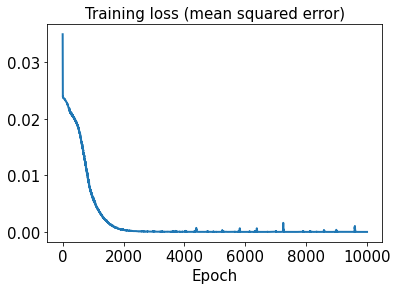

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

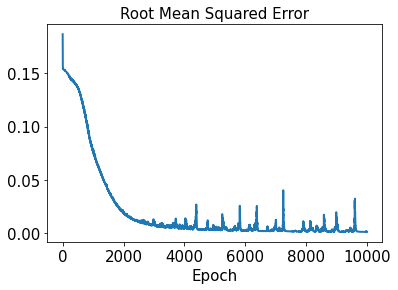

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

3.0381325e-05


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.06647653


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

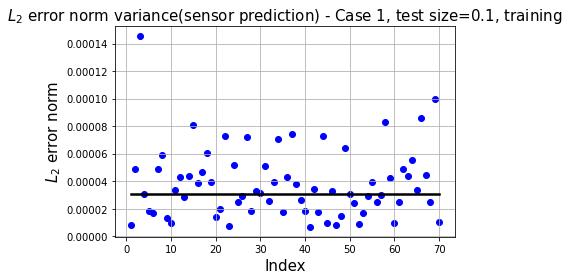

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

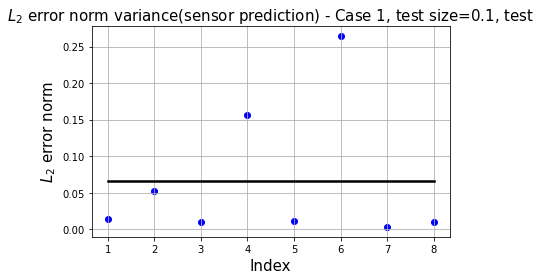

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 2/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0113 - rmse: 0.1053
Epoch 3/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0112 - rmse: 0.1052
Epoch 4/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0112 - rmse: 0.1051
Epoch 5/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0112 - rmse: 0.1049
Epoch 6/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0111 - rmse: 0.1048
Epoch 7/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0111 - rmse: 0.1047
Epoch 8/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0111 - rmse: 0.1045
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 11/10000
2/2 [=====================

2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 89/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 90/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0649
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0404
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0392
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0390
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 7.9660e-04 - rmse: 0.0252
Epoch 254/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8950e-04 - rmse: 0.0251
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8098e-04 - rmse: 0.0249
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7537e-04 - rmse: 0.0248
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6797e-04 - rmse: 0.0246
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6113e-04 - rmse: 0.0245
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5517e-04 - rmse: 0.0244
Epoch 260/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4752e-04 - rmse: 0.0242
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4193e-04 - rmse: 0.0241
Epoch 262/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3508e-04 - rmse: 0.0240
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 4.7981e-04 - rmse: 0.0179
Epoch 335/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7750e-04 - rmse: 0.0178
Epoch 336/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7551e-04 - rmse: 0.0178
Epoch 337/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7385e-04 - rmse: 0.0177
Epoch 338/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7179e-04 - rmse: 0.0177
Epoch 339/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7047e-04 - rmse: 0.0176
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6852e-04 - rmse: 0.0176
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6644e-04 - rmse: 0.0175
Epoch 342/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6523e-04 - rmse: 0.0175
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6286e-04 - rmse: 0.0174
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 3.6100e-04 - rmse: 0.0142
Epoch 416/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5979e-04 - rmse: 0.0142
Epoch 417/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5907e-04 - rmse: 0.0142
Epoch 418/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5754e-04 - rmse: 0.0141
Epoch 419/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5667e-04 - rmse: 0.0141
Epoch 420/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5539e-04 - rmse: 0.0140
Epoch 421/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5419e-04 - rmse: 0.0140
Epoch 422/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5272e-04 - rmse: 0.0139
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5252e-04 - rmse: 0.0139
Epoch 424/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5108e-04 - rmse: 0.0139
Epoch 

2/2 [==============================] - 0s 7ms/step - loss: 2.9365e-04 - rmse: 0.0117
Epoch 497/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9258e-04 - rmse: 0.0117
Epoch 498/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9225e-04 - rmse: 0.0116
Epoch 499/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9144e-04 - rmse: 0.0116
Epoch 500/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9117e-04 - rmse: 0.0116
Epoch 501/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9032e-04 - rmse: 0.0116
Epoch 502/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8949e-04 - rmse: 0.0115
Epoch 503/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8911e-04 - rmse: 0.0115
Epoch 504/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8857e-04 - rmse: 0.0115
Epoch 505/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8770e-04 - rmse: 0.0115
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 2.5174e-04 - rmse: 0.0099
Epoch 578/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5127e-04 - rmse: 0.0098
Epoch 579/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5089e-04 - rmse: 0.0098
Epoch 580/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5056e-04 - rmse: 0.0098
Epoch 581/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5008e-04 - rmse: 0.0098
Epoch 582/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4962e-04 - rmse: 0.0098
Epoch 583/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4934e-04 - rmse: 0.0098
Epoch 584/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4871e-04 - rmse: 0.0097
Epoch 585/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4843e-04 - rmse: 0.0097
Epoch 586/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4797e-04 - rmse: 0.0097
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 2.2450e-04 - rmse: 0.0085
Epoch 659/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2396e-04 - rmse: 0.0085
Epoch 660/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2388e-04 - rmse: 0.0085
Epoch 661/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2350e-04 - rmse: 0.0085
Epoch 662/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2316e-04 - rmse: 0.0084
Epoch 663/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2334e-04 - rmse: 0.0085
Epoch 664/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2264e-04 - rmse: 0.0084
Epoch 665/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2241e-04 - rmse: 0.0084
Epoch 666/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2214e-04 - rmse: 0.0084
Epoch 667/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2182e-04 - rmse: 0.0084
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 2.0569e-04 - rmse: 0.0075
Epoch 740/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0565e-04 - rmse: 0.0075
Epoch 741/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0549e-04 - rmse: 0.0075
Epoch 742/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0511e-04 - rmse: 0.0075
Epoch 743/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0519e-04 - rmse: 0.0075
Epoch 744/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0484e-04 - rmse: 0.0075
Epoch 745/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0460e-04 - rmse: 0.0075
Epoch 746/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0457e-04 - rmse: 0.0075
Epoch 747/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0427e-04 - rmse: 0.0074
Epoch 748/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0418e-04 - rmse: 0.0074
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.9250e-04 - rmse: 0.0068
Epoch 821/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9242e-04 - rmse: 0.0068
Epoch 822/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9218e-04 - rmse: 0.0068
Epoch 823/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9197e-04 - rmse: 0.0068
Epoch 824/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9197e-04 - rmse: 0.0068
Epoch 825/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9198e-04 - rmse: 0.0068
Epoch 826/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9155e-04 - rmse: 0.0067
Epoch 827/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9164e-04 - rmse: 0.0067
Epoch 828/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9138e-04 - rmse: 0.0067
Epoch 829/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9132e-04 - rmse: 0.0067
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 1.8191e-04 - rmse: 0.0062
Epoch 902/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8193e-04 - rmse: 0.0062
Epoch 903/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8171e-04 - rmse: 0.0062
Epoch 904/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8166e-04 - rmse: 0.0062
Epoch 905/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8162e-04 - rmse: 0.0062
Epoch 906/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8145e-04 - rmse: 0.0062
Epoch 907/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8131e-04 - rmse: 0.0062
Epoch 908/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8108e-04 - rmse: 0.0062
Epoch 909/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8109e-04 - rmse: 0.0062
Epoch 910/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8108e-04 - rmse: 0.0062
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.7305e-04 - rmse: 0.0057
Epoch 983/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7285e-04 - rmse: 0.0057
Epoch 984/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7288e-04 - rmse: 0.0057
Epoch 985/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7272e-04 - rmse: 0.0057
Epoch 986/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7267e-04 - rmse: 0.0057
Epoch 987/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7251e-04 - rmse: 0.0057
Epoch 988/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7239e-04 - rmse: 0.0057
Epoch 989/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7226e-04 - rmse: 0.0057
Epoch 990/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7224e-04 - rmse: 0.0057
Epoch 991/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7210e-04 - rmse: 0.0057
Epoch 

2/2 [==============================] - 0s 7ms/step - loss: 1.6544e-04 - rmse: 0.0053
Epoch 1063/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6519e-04 - rmse: 0.0053
Epoch 1064/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6520e-04 - rmse: 0.0053
Epoch 1065/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6517e-04 - rmse: 0.0053
Epoch 1066/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6508e-04 - rmse: 0.0053
Epoch 1067/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6489e-04 - rmse: 0.0053
Epoch 1068/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6481e-04 - rmse: 0.0052
Epoch 1069/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6481e-04 - rmse: 0.0053
Epoch 1070/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6465e-04 - rmse: 0.0052
Epoch 1071/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6450e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.5855e-04 - rmse: 0.0049
Epoch 1143/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5849e-04 - rmse: 0.0049
Epoch 1144/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5842e-04 - rmse: 0.0049
Epoch 1145/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5834e-04 - rmse: 0.0049
Epoch 1146/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5817e-04 - rmse: 0.0049
Epoch 1147/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5824e-04 - rmse: 0.0049
Epoch 1148/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5803e-04 - rmse: 0.0049
Epoch 1149/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5799e-04 - rmse: 0.0049
Epoch 1150/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5798e-04 - rmse: 0.0049
Epoch 1151/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5791e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.5257e-04 - rmse: 0.0046
Epoch 1223/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5245e-04 - rmse: 0.0046
Epoch 1224/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5247e-04 - rmse: 0.0046
Epoch 1225/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5231e-04 - rmse: 0.0046
Epoch 1226/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5230e-04 - rmse: 0.0046
Epoch 1227/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5217e-04 - rmse: 0.0046
Epoch 1228/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5204e-04 - rmse: 0.0046
Epoch 1229/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5222e-04 - rmse: 0.0046
Epoch 1230/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5191e-04 - rmse: 0.0046
Epoch 1231/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5191e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.4708e-04 - rmse: 0.0043
Epoch 1303/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4706e-04 - rmse: 0.0043
Epoch 1304/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4695e-04 - rmse: 0.0043
Epoch 1305/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4696e-04 - rmse: 0.0043
Epoch 1306/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4685e-04 - rmse: 0.0043
Epoch 1307/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4675e-04 - rmse: 0.0043
Epoch 1308/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4684e-04 - rmse: 0.0043
Epoch 1309/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4676e-04 - rmse: 0.0043
Epoch 1310/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4663e-04 - rmse: 0.0043
Epoch 1311/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4648e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4205e-04 - rmse: 0.0041
Epoch 1383/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4198e-04 - rmse: 0.0041
Epoch 1384/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4193e-04 - rmse: 0.0041
Epoch 1385/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4191e-04 - rmse: 0.0041
Epoch 1386/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4181e-04 - rmse: 0.0041
Epoch 1387/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4175e-04 - rmse: 0.0041
Epoch 1388/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4171e-04 - rmse: 0.0041
Epoch 1389/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4167e-04 - rmse: 0.0041
Epoch 1390/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4151e-04 - rmse: 0.0040
Epoch 1391/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4161e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.3754e-04 - rmse: 0.0039
Epoch 1463/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3745e-04 - rmse: 0.0039
Epoch 1464/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3737e-04 - rmse: 0.0039
Epoch 1465/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3730e-04 - rmse: 0.0039
Epoch 1466/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3725e-04 - rmse: 0.0039
Epoch 1467/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3724e-04 - rmse: 0.0039
Epoch 1468/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3722e-04 - rmse: 0.0039
Epoch 1469/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3705e-04 - rmse: 0.0038
Epoch 1470/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3705e-04 - rmse: 0.0039
Epoch 1471/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3696e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.3309e-04 - rmse: 0.0037
Epoch 1543/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3314e-04 - rmse: 0.0037
Epoch 1544/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3301e-04 - rmse: 0.0037
Epoch 1545/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3297e-04 - rmse: 0.0037
Epoch 1546/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3305e-04 - rmse: 0.0037
Epoch 1547/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3282e-04 - rmse: 0.0037
Epoch 1548/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3288e-04 - rmse: 0.0037
Epoch 1549/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3281e-04 - rmse: 0.0037
Epoch 1550/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3277e-04 - rmse: 0.0037
Epoch 1551/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3277e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.2900e-04 - rmse: 0.0035
Epoch 1623/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2895e-04 - rmse: 0.0035
Epoch 1624/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2894e-04 - rmse: 0.0035
Epoch 1625/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2892e-04 - rmse: 0.0035
Epoch 1626/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2885e-04 - rmse: 0.0035
Epoch 1627/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2876e-04 - rmse: 0.0035
Epoch 1628/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2871e-04 - rmse: 0.0035
Epoch 1629/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2863e-04 - rmse: 0.0035
Epoch 1630/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2857e-04 - rmse: 0.0035
Epoch 1631/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2854e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2508e-04 - rmse: 0.0034
Epoch 1703/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2503e-04 - rmse: 0.0034
Epoch 1704/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2496e-04 - rmse: 0.0034
Epoch 1705/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2502e-04 - rmse: 0.0034
Epoch 1706/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2492e-04 - rmse: 0.0034
Epoch 1707/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2495e-04 - rmse: 0.0034
Epoch 1708/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2492e-04 - rmse: 0.0034
Epoch 1709/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2497e-04 - rmse: 0.0034
Epoch 1710/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2482e-04 - rmse: 0.0034
Epoch 1711/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2470e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2147e-04 - rmse: 0.0033
Epoch 1783/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2132e-04 - rmse: 0.0032
Epoch 1784/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2128e-04 - rmse: 0.0032
Epoch 1785/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2125e-04 - rmse: 0.0032
Epoch 1786/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2119e-04 - rmse: 0.0032
Epoch 1787/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2119e-04 - rmse: 0.0032
Epoch 1788/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2108e-04 - rmse: 0.0032
Epoch 1789/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2106e-04 - rmse: 0.0032
Epoch 1790/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2098e-04 - rmse: 0.0032
Epoch 1791/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2097e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1776e-04 - rmse: 0.0031
Epoch 1863/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1779e-04 - rmse: 0.0031
Epoch 1864/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1768e-04 - rmse: 0.0031
Epoch 1865/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1760e-04 - rmse: 0.0031
Epoch 1866/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1764e-04 - rmse: 0.0031
Epoch 1867/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1760e-04 - rmse: 0.0031
Epoch 1868/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1755e-04 - rmse: 0.0031
Epoch 1869/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1747e-04 - rmse: 0.0031
Epoch 1870/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1744e-04 - rmse: 0.0031
Epoch 1871/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1739e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1429e-04 - rmse: 0.0030
Epoch 1943/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1427e-04 - rmse: 0.0030
Epoch 1944/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1424e-04 - rmse: 0.0030
Epoch 1945/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1423e-04 - rmse: 0.0030
Epoch 1946/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1412e-04 - rmse: 0.0030
Epoch 1947/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1411e-04 - rmse: 0.0030
Epoch 1948/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1406e-04 - rmse: 0.0030
Epoch 1949/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1396e-04 - rmse: 0.0030
Epoch 1950/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1397e-04 - rmse: 0.0030
Epoch 1951/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1391e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1104e-04 - rmse: 0.0029
Epoch 2023/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1095e-04 - rmse: 0.0029
Epoch 2024/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1092e-04 - rmse: 0.0029
Epoch 2025/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1086e-04 - rmse: 0.0029
Epoch 2026/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1084e-04 - rmse: 0.0029
Epoch 2027/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1086e-04 - rmse: 0.0029
Epoch 2028/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1075e-04 - rmse: 0.0029
Epoch 2029/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1074e-04 - rmse: 0.0029
Epoch 2030/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1072e-04 - rmse: 0.0029
Epoch 2031/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1064e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.0777e-04 - rmse: 0.0028
Epoch 2103/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0775e-04 - rmse: 0.0028
Epoch 2104/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0774e-04 - rmse: 0.0028
Epoch 2105/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0767e-04 - rmse: 0.0028
Epoch 2106/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0768e-04 - rmse: 0.0028
Epoch 2107/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0765e-04 - rmse: 0.0028
Epoch 2108/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0762e-04 - rmse: 0.0028
Epoch 2109/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0753e-04 - rmse: 0.0028
Epoch 2110/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0749e-04 - rmse: 0.0028
Epoch 2111/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0755e-04 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.0478e-04 - rmse: 0.0027
Epoch 2183/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0475e-04 - rmse: 0.0027
Epoch 2184/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0465e-04 - rmse: 0.0027
Epoch 2185/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0462e-04 - rmse: 0.0027
Epoch 2186/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0459e-04 - rmse: 0.0027
Epoch 2187/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0464e-04 - rmse: 0.0027
Epoch 2188/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0457e-04 - rmse: 0.0027
Epoch 2189/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0452e-04 - rmse: 0.0027
Epoch 2190/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0453e-04 - rmse: 0.0027
Epoch 2191/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0450e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0190e-04 - rmse: 0.0026
Epoch 2263/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0200e-04 - rmse: 0.0027
Epoch 2264/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0187e-04 - rmse: 0.0026
Epoch 2265/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0192e-04 - rmse: 0.0027
Epoch 2266/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0181e-04 - rmse: 0.0026
Epoch 2267/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0172e-04 - rmse: 0.0026
Epoch 2268/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0169e-04 - rmse: 0.0026
Epoch 2269/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0162e-04 - rmse: 0.0026
Epoch 2270/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0161e-04 - rmse: 0.0026
Epoch 2271/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0146e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.9076e-05 - rmse: 0.0025
Epoch 2343/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8999e-05 - rmse: 0.0025
Epoch 2344/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9022e-05 - rmse: 0.0025
Epoch 2345/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8966e-05 - rmse: 0.0025
Epoch 2346/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8969e-05 - rmse: 0.0026
Epoch 2347/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8863e-05 - rmse: 0.0025
Epoch 2348/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8768e-05 - rmse: 0.0025
Epoch 2349/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8757e-05 - rmse: 0.0025
Epoch 2350/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8662e-05 - rmse: 0.0025
Epoch 2351/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8684e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.6171e-05 - rmse: 0.0024
Epoch 2423/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6174e-05 - rmse: 0.0024
Epoch 2424/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6131e-05 - rmse: 0.0024
Epoch 2425/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6090e-05 - rmse: 0.0024
Epoch 2426/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6095e-05 - rmse: 0.0024
Epoch 2427/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6045e-05 - rmse: 0.0024
Epoch 2428/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6008e-05 - rmse: 0.0024
Epoch 2429/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5962e-05 - rmse: 0.0024
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5912e-05 - rmse: 0.0024
Epoch 2431/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5903e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.3621e-05 - rmse: 0.0024
Epoch 2503/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3572e-05 - rmse: 0.0024
Epoch 2504/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3543e-05 - rmse: 0.0024
Epoch 2505/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3503e-05 - rmse: 0.0024
Epoch 2506/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3453e-05 - rmse: 0.0024
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3416e-05 - rmse: 0.0024
Epoch 2508/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3404e-05 - rmse: 0.0024
Epoch 2509/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3339e-05 - rmse: 0.0024
Epoch 2510/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3380e-05 - rmse: 0.0024
Epoch 2511/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3297e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 9.1227e-05 - rmse: 0.0024
Epoch 2583/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1304e-05 - rmse: 0.0024
Epoch 2584/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1322e-05 - rmse: 0.0024
Epoch 2585/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1112e-05 - rmse: 0.0023
Epoch 2586/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1102e-05 - rmse: 0.0023
Epoch 2587/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0993e-05 - rmse: 0.0023
Epoch 2588/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0969e-05 - rmse: 0.0023
Epoch 2589/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0991e-05 - rmse: 0.0023
Epoch 2590/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0835e-05 - rmse: 0.0023
Epoch 2591/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0863e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.8724e-05 - rmse: 0.0023
Epoch 2663/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8647e-05 - rmse: 0.0023
Epoch 2664/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8624e-05 - rmse: 0.0023
Epoch 2665/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8548e-05 - rmse: 0.0023
Epoch 2666/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8498e-05 - rmse: 0.0023
Epoch 2667/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8489e-05 - rmse: 0.0023
Epoch 2668/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8442e-05 - rmse: 0.0023
Epoch 2669/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8425e-05 - rmse: 0.0023
Epoch 2670/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.8412e-05 - rmse: 0.0023
Epoch 2671/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8361e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.6344e-05 - rmse: 0.0022
Epoch 2743/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6292e-05 - rmse: 0.0022
Epoch 2744/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6251e-05 - rmse: 0.0022
Epoch 2745/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6240e-05 - rmse: 0.0022
Epoch 2746/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6203e-05 - rmse: 0.0022
Epoch 2747/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6148e-05 - rmse: 0.0022
Epoch 2748/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6141e-05 - rmse: 0.0022
Epoch 2749/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6129e-05 - rmse: 0.0022
Epoch 2750/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6092e-05 - rmse: 0.0022
Epoch 2751/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6090e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.4085e-05 - rmse: 0.0022
Epoch 2823/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4081e-05 - rmse: 0.0022
Epoch 2824/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3985e-05 - rmse: 0.0022
Epoch 2825/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4020e-05 - rmse: 0.0022
Epoch 2826/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3999e-05 - rmse: 0.0022
Epoch 2827/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3948e-05 - rmse: 0.0022
Epoch 2828/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3919e-05 - rmse: 0.0022
Epoch 2829/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3890e-05 - rmse: 0.0022
Epoch 2830/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3889e-05 - rmse: 0.0022
Epoch 2831/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3844e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.2108e-05 - rmse: 0.0022
Epoch 2903/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2026e-05 - rmse: 0.0022
Epoch 2904/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2109e-05 - rmse: 0.0022
Epoch 2905/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2147e-05 - rmse: 0.0022
Epoch 2906/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2209e-05 - rmse: 0.0022
Epoch 2907/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1990e-05 - rmse: 0.0022
Epoch 2908/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1814e-05 - rmse: 0.0021
Epoch 2909/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1764e-05 - rmse: 0.0021
Epoch 2910/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1728e-05 - rmse: 0.0021
Epoch 2911/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1653e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.9805e-05 - rmse: 0.0021
Epoch 2983/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9777e-05 - rmse: 0.0021
Epoch 2984/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9776e-05 - rmse: 0.0021
Epoch 2985/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9764e-05 - rmse: 0.0021
Epoch 2986/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9755e-05 - rmse: 0.0021
Epoch 2987/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9695e-05 - rmse: 0.0021
Epoch 2988/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9675e-05 - rmse: 0.0021
Epoch 2989/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9606e-05 - rmse: 0.0021
Epoch 2990/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9588e-05 - rmse: 0.0021
Epoch 2991/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9592e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.7825e-05 - rmse: 0.0020
Epoch 3063/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7799e-05 - rmse: 0.0020
Epoch 3064/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7726e-05 - rmse: 0.0020
Epoch 3065/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7724e-05 - rmse: 0.0020
Epoch 3066/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7668e-05 - rmse: 0.0020
Epoch 3067/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7695e-05 - rmse: 0.0020
Epoch 3068/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7646e-05 - rmse: 0.0020
Epoch 3069/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7642e-05 - rmse: 0.0020
Epoch 3070/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7599e-05 - rmse: 0.0020
Epoch 3071/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7553e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.6153e-05 - rmse: 0.0021
Epoch 3143/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5981e-05 - rmse: 0.0020
Epoch 3144/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5955e-05 - rmse: 0.0020
Epoch 3145/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5882e-05 - rmse: 0.0020
Epoch 3146/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5948e-05 - rmse: 0.0020
Epoch 3147/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5979e-05 - rmse: 0.0020
Epoch 3148/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5945e-05 - rmse: 0.0020
Epoch 3149/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5823e-05 - rmse: 0.0020
Epoch 3150/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5754e-05 - rmse: 0.0020
Epoch 3151/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5682e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.4001e-05 - rmse: 0.0020
Epoch 3223/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3959e-05 - rmse: 0.0019
Epoch 3224/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3918e-05 - rmse: 0.0019
Epoch 3225/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3945e-05 - rmse: 0.0020
Epoch 3226/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3877e-05 - rmse: 0.0019
Epoch 3227/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3893e-05 - rmse: 0.0020
Epoch 3228/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3881e-05 - rmse: 0.0020
Epoch 3229/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3839e-05 - rmse: 0.0020
Epoch 3230/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3818e-05 - rmse: 0.0020
Epoch 3231/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3767e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.2264e-05 - rmse: 0.0019
Epoch 3303/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2224e-05 - rmse: 0.0019
Epoch 3304/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2290e-05 - rmse: 0.0020
Epoch 3305/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2235e-05 - rmse: 0.0019
Epoch 3306/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2220e-05 - rmse: 0.0019
Epoch 3307/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2179e-05 - rmse: 0.0019
Epoch 3308/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2167e-05 - rmse: 0.0019
Epoch 3309/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2175e-05 - rmse: 0.0020
Epoch 3310/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2120e-05 - rmse: 0.0019
Epoch 3311/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2084e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.0552e-05 - rmse: 0.0019
Epoch 3383/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0542e-05 - rmse: 0.0019
Epoch 3384/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0480e-05 - rmse: 0.0019
Epoch 3385/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0441e-05 - rmse: 0.0019
Epoch 3386/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0424e-05 - rmse: 0.0019
Epoch 3387/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0418e-05 - rmse: 0.0019
Epoch 3388/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0391e-05 - rmse: 0.0019
Epoch 3389/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0381e-05 - rmse: 0.0019
Epoch 3390/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0306e-05 - rmse: 0.0019
Epoch 3391/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0278e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.8772e-05 - rmse: 0.0019
Epoch 3463/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8727e-05 - rmse: 0.0018
Epoch 3464/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8706e-05 - rmse: 0.0018
Epoch 3465/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8687e-05 - rmse: 0.0018
Epoch 3466/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8701e-05 - rmse: 0.0019
Epoch 3467/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8668e-05 - rmse: 0.0019
Epoch 3468/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8639e-05 - rmse: 0.0019
Epoch 3469/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8649e-05 - rmse: 0.0019
Epoch 3470/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8670e-05 - rmse: 0.0019
Epoch 3471/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8606e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.7142e-05 - rmse: 0.0018
Epoch 3543/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7108e-05 - rmse: 0.0018
Epoch 3544/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7088e-05 - rmse: 0.0018
Epoch 3545/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7143e-05 - rmse: 0.0018
Epoch 3546/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7088e-05 - rmse: 0.0018
Epoch 3547/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7091e-05 - rmse: 0.0018
Epoch 3548/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7035e-05 - rmse: 0.0018
Epoch 3549/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7059e-05 - rmse: 0.0018
Epoch 3550/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7060e-05 - rmse: 0.0018
Epoch 3551/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7054e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.5570e-05 - rmse: 0.0018
Epoch 3623/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5519e-05 - rmse: 0.0018
Epoch 3624/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5493e-05 - rmse: 0.0018
Epoch 3625/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5465e-05 - rmse: 0.0018
Epoch 3626/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5460e-05 - rmse: 0.0018
Epoch 3627/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5450e-05 - rmse: 0.0018
Epoch 3628/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5407e-05 - rmse: 0.0018
Epoch 3629/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5394e-05 - rmse: 0.0018
Epoch 3630/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5368e-05 - rmse: 0.0018
Epoch 3631/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5357e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.4006e-05 - rmse: 0.0018
Epoch 3703/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3996e-05 - rmse: 0.0018
Epoch 3704/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3975e-05 - rmse: 0.0018
Epoch 3705/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3981e-05 - rmse: 0.0018
Epoch 3706/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3942e-05 - rmse: 0.0018
Epoch 3707/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3907e-05 - rmse: 0.0018
Epoch 3708/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3906e-05 - rmse: 0.0018
Epoch 3709/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3885e-05 - rmse: 0.0018
Epoch 3710/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3869e-05 - rmse: 0.0018
Epoch 3711/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3837e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2688e-05 - rmse: 0.0018
Epoch 3783/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2634e-05 - rmse: 0.0018
Epoch 3784/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2553e-05 - rmse: 0.0018
Epoch 3785/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2565e-05 - rmse: 0.0018
Epoch 3786/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2582e-05 - rmse: 0.0018
Epoch 3787/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2582e-05 - rmse: 0.0018
Epoch 3788/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2560e-05 - rmse: 0.0018
Epoch 3789/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2539e-05 - rmse: 0.0018
Epoch 3790/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2459e-05 - rmse: 0.0018
Epoch 3791/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2414e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.1194e-05 - rmse: 0.0017
Epoch 3863/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1143e-05 - rmse: 0.0017
Epoch 3864/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1102e-05 - rmse: 0.0017
Epoch 3865/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1065e-05 - rmse: 0.0017
Epoch 3866/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1017e-05 - rmse: 0.0017
Epoch 3867/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1022e-05 - rmse: 0.0017
Epoch 3868/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0990e-05 - rmse: 0.0017
Epoch 3869/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1015e-05 - rmse: 0.0017
Epoch 3870/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0968e-05 - rmse: 0.0017
Epoch 3871/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0976e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9721e-05 - rmse: 0.0017
Epoch 3943/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9683e-05 - rmse: 0.0017
Epoch 3944/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9690e-05 - rmse: 0.0017
Epoch 3945/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9656e-05 - rmse: 0.0017
Epoch 3946/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9621e-05 - rmse: 0.0017
Epoch 3947/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9628e-05 - rmse: 0.0017
Epoch 3948/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9592e-05 - rmse: 0.0017
Epoch 3949/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9580e-05 - rmse: 0.0017
Epoch 3950/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9589e-05 - rmse: 0.0017
Epoch 3951/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9596e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.8457e-05 - rmse: 0.0017
Epoch 4023/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8456e-05 - rmse: 0.0017
Epoch 4024/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8457e-05 - rmse: 0.0017
Epoch 4025/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8379e-05 - rmse: 0.0017
Epoch 4026/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8365e-05 - rmse: 0.0017
Epoch 4027/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8369e-05 - rmse: 0.0017
Epoch 4028/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8308e-05 - rmse: 0.0017
Epoch 4029/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8280e-05 - rmse: 0.0017
Epoch 4030/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8319e-05 - rmse: 0.0017
Epoch 4031/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8272e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.7097e-05 - rmse: 0.0016
Epoch 4103/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7097e-05 - rmse: 0.0016
Epoch 4104/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7228e-05 - rmse: 0.0017
Epoch 4105/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7103e-05 - rmse: 0.0016
Epoch 4106/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7100e-05 - rmse: 0.0017
Epoch 4107/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7038e-05 - rmse: 0.0016
Epoch 4108/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7016e-05 - rmse: 0.0016
Epoch 4109/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7005e-05 - rmse: 0.0016
Epoch 4110/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7007e-05 - rmse: 0.0016
Epoch 4111/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6994e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5874e-05 - rmse: 0.0016
Epoch 4183/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5845e-05 - rmse: 0.0016
Epoch 4184/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5866e-05 - rmse: 0.0016
Epoch 4185/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5852e-05 - rmse: 0.0016
Epoch 4186/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5828e-05 - rmse: 0.0016
Epoch 4187/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5795e-05 - rmse: 0.0016
Epoch 4188/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5756e-05 - rmse: 0.0016
Epoch 4189/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5765e-05 - rmse: 0.0016
Epoch 4190/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5768e-05 - rmse: 0.0016
Epoch 4191/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5720e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.4855e-05 - rmse: 0.0016
Epoch 4263/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4747e-05 - rmse: 0.0016
Epoch 4264/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4698e-05 - rmse: 0.0016
Epoch 4265/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4705e-05 - rmse: 0.0016
Epoch 4266/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4661e-05 - rmse: 0.0016
Epoch 4267/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4664e-05 - rmse: 0.0016
Epoch 4268/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4663e-05 - rmse: 0.0016
Epoch 4269/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4662e-05 - rmse: 0.0016
Epoch 4270/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4649e-05 - rmse: 0.0016
Epoch 4271/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4619e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.3572e-05 - rmse: 0.0016
Epoch 4343/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3548e-05 - rmse: 0.0016
Epoch 4344/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3521e-05 - rmse: 0.0016
Epoch 4345/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3498e-05 - rmse: 0.0016
Epoch 4346/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3480e-05 - rmse: 0.0016
Epoch 4347/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3488e-05 - rmse: 0.0016
Epoch 4348/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3486e-05 - rmse: 0.0016
Epoch 4349/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3489e-05 - rmse: 0.0016
Epoch 4350/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3446e-05 - rmse: 0.0016
Epoch 4351/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3461e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.2424e-05 - rmse: 0.0015
Epoch 4423/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2405e-05 - rmse: 0.0015
Epoch 4424/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2389e-05 - rmse: 0.0015
Epoch 4425/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2380e-05 - rmse: 0.0015
Epoch 4426/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2360e-05 - rmse: 0.0015
Epoch 4427/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2360e-05 - rmse: 0.0015
Epoch 4428/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2370e-05 - rmse: 0.0015
Epoch 4429/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2358e-05 - rmse: 0.0015
Epoch 4430/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2359e-05 - rmse: 0.0015
Epoch 4431/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2335e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.1580e-05 - rmse: 0.0016
Epoch 4503/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1515e-05 - rmse: 0.0016
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1500e-05 - rmse: 0.0016
Epoch 4505/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1478e-05 - rmse: 0.0016
Epoch 4506/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1482e-05 - rmse: 0.0016
Epoch 4507/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1503e-05 - rmse: 0.0016
Epoch 4508/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1490e-05 - rmse: 0.0016
Epoch 4509/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1463e-05 - rmse: 0.0016
Epoch 4510/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1455e-05 - rmse: 0.0016
Epoch 4511/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1377e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.0333e-05 - rmse: 0.0015
Epoch 4583/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0302e-05 - rmse: 0.0015
Epoch 4584/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0306e-05 - rmse: 0.0015
Epoch 4585/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0284e-05 - rmse: 0.0015
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0276e-05 - rmse: 0.0015
Epoch 4587/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0256e-05 - rmse: 0.0015
Epoch 4588/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0263e-05 - rmse: 0.0015
Epoch 4589/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0232e-05 - rmse: 0.0015
Epoch 4590/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0225e-05 - rmse: 0.0015
Epoch 4591/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0209e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.9649e-05 - rmse: 0.0016
Epoch 4663/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9655e-05 - rmse: 0.0016
Epoch 4664/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9611e-05 - rmse: 0.0016
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9526e-05 - rmse: 0.0016
Epoch 4666/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9519e-05 - rmse: 0.0016
Epoch 4667/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9467e-05 - rmse: 0.0015
Epoch 4668/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9412e-05 - rmse: 0.0015
Epoch 4669/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9364e-05 - rmse: 0.0015
Epoch 4670/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9325e-05 - rmse: 0.0015
Epoch 4671/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9313e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.8468e-05 - rmse: 0.0015
Epoch 4743/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8438e-05 - rmse: 0.0015
Epoch 4744/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8450e-05 - rmse: 0.0015
Epoch 4745/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8430e-05 - rmse: 0.0015
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8468e-05 - rmse: 0.0015
Epoch 4747/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8441e-05 - rmse: 0.0015
Epoch 4748/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8446e-05 - rmse: 0.0015
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8423e-05 - rmse: 0.0015
Epoch 4750/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8403e-05 - rmse: 0.0015
Epoch 4751/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8360e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.7522e-05 - rmse: 0.0015
Epoch 4823/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7506e-05 - rmse: 0.0015
Epoch 4824/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7495e-05 - rmse: 0.0015
Epoch 4825/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7488e-05 - rmse: 0.0015
Epoch 4826/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7458e-05 - rmse: 0.0015
Epoch 4827/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7460e-05 - rmse: 0.0015
Epoch 4828/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7426e-05 - rmse: 0.0014
Epoch 4829/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7424e-05 - rmse: 0.0014
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7438e-05 - rmse: 0.0015
Epoch 4831/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7407e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.6588e-05 - rmse: 0.0014
Epoch 4903/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6574e-05 - rmse: 0.0014
Epoch 4904/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6558e-05 - rmse: 0.0014
Epoch 4905/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6578e-05 - rmse: 0.0014
Epoch 4906/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6539e-05 - rmse: 0.0014
Epoch 4907/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6535e-05 - rmse: 0.0014
Epoch 4908/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6544e-05 - rmse: 0.0014
Epoch 4909/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6520e-05 - rmse: 0.0014
Epoch 4910/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6516e-05 - rmse: 0.0014
Epoch 4911/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6537e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.5738e-05 - rmse: 0.0014
Epoch 4983/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5747e-05 - rmse: 0.0014
Epoch 4984/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5754e-05 - rmse: 0.0014
Epoch 4985/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5699e-05 - rmse: 0.0014
Epoch 4986/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5720e-05 - rmse: 0.0014
Epoch 4987/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5683e-05 - rmse: 0.0014
Epoch 4988/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5665e-05 - rmse: 0.0014
Epoch 4989/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5635e-05 - rmse: 0.0014
Epoch 4990/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5622e-05 - rmse: 0.0014
Epoch 4991/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5648e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.4987e-05 - rmse: 0.0014
Epoch 5063/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4972e-05 - rmse: 0.0014
Epoch 5064/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4946e-05 - rmse: 0.0014
Epoch 5065/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4928e-05 - rmse: 0.0014
Epoch 5066/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4980e-05 - rmse: 0.0015
Epoch 5067/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4971e-05 - rmse: 0.0015
Epoch 5068/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5018e-05 - rmse: 0.0015
Epoch 5069/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5023e-05 - rmse: 0.0015
Epoch 5070/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4937e-05 - rmse: 0.0015
Epoch 5071/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4987e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 4.4220e-05 - rmse: 0.0014
Epoch 5143/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4198e-05 - rmse: 0.0014
Epoch 5144/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4202e-05 - rmse: 0.0014
Epoch 5145/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4130e-05 - rmse: 0.0014
Epoch 5146/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4111e-05 - rmse: 0.0014
Epoch 5147/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4093e-05 - rmse: 0.0014
Epoch 5148/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4072e-05 - rmse: 0.0014
Epoch 5149/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4047e-05 - rmse: 0.0014
Epoch 5150/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4102e-05 - rmse: 0.0014
Epoch 5151/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4072e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 4.3267e-05 - rmse: 0.0014
Epoch 5223/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3232e-05 - rmse: 0.0014
Epoch 5224/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3241e-05 - rmse: 0.0014
Epoch 5225/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3231e-05 - rmse: 0.0014
Epoch 5226/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3224e-05 - rmse: 0.0014
Epoch 5227/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3220e-05 - rmse: 0.0014
Epoch 5228/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3207e-05 - rmse: 0.0014
Epoch 5229/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3211e-05 - rmse: 0.0014
Epoch 5230/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3190e-05 - rmse: 0.0014
Epoch 5231/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3182e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.2525e-05 - rmse: 0.0014
Epoch 5303/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2515e-05 - rmse: 0.0014
Epoch 5304/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2508e-05 - rmse: 0.0014
Epoch 5305/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2488e-05 - rmse: 0.0014
Epoch 5306/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2465e-05 - rmse: 0.0014
Epoch 5307/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2454e-05 - rmse: 0.0014
Epoch 5308/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2459e-05 - rmse: 0.0014
Epoch 5309/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2434e-05 - rmse: 0.0014
Epoch 5310/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2435e-05 - rmse: 0.0014
Epoch 5311/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2442e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.1743e-05 - rmse: 0.0013
Epoch 5383/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1726e-05 - rmse: 0.0013
Epoch 5384/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1751e-05 - rmse: 0.0013
Epoch 5385/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1724e-05 - rmse: 0.0013
Epoch 5386/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1739e-05 - rmse: 0.0014
Epoch 5387/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1731e-05 - rmse: 0.0014
Epoch 5388/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1737e-05 - rmse: 0.0014
Epoch 5389/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1684e-05 - rmse: 0.0013
Epoch 5390/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1695e-05 - rmse: 0.0013
Epoch 5391/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1707e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.1097e-05 - rmse: 0.0014
Epoch 5463/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1114e-05 - rmse: 0.0014
Epoch 5464/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1096e-05 - rmse: 0.0014
Epoch 5465/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1105e-05 - rmse: 0.0014
Epoch 5466/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1044e-05 - rmse: 0.0013
Epoch 5467/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1071e-05 - rmse: 0.0014
Epoch 5468/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1055e-05 - rmse: 0.0014
Epoch 5469/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1057e-05 - rmse: 0.0014
Epoch 5470/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1024e-05 - rmse: 0.0014
Epoch 5471/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1053e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.0453e-05 - rmse: 0.0014
Epoch 5543/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0391e-05 - rmse: 0.0013
Epoch 5544/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0380e-05 - rmse: 0.0013
Epoch 5545/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0395e-05 - rmse: 0.0013
Epoch 5546/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0527e-05 - rmse: 0.0014
Epoch 5547/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0494e-05 - rmse: 0.0014
Epoch 5548/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0467e-05 - rmse: 0.0014
Epoch 5549/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0428e-05 - rmse: 0.0014
Epoch 5550/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0463e-05 - rmse: 0.0014
Epoch 5551/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0462e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.9669e-05 - rmse: 0.0013
Epoch 5623/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9666e-05 - rmse: 0.0013
Epoch 5624/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9648e-05 - rmse: 0.0013
Epoch 5625/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9654e-05 - rmse: 0.0013
Epoch 5626/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9636e-05 - rmse: 0.0013
Epoch 5627/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9663e-05 - rmse: 0.0013
Epoch 5628/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9652e-05 - rmse: 0.0013
Epoch 5629/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9630e-05 - rmse: 0.0013
Epoch 5630/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9603e-05 - rmse: 0.0013
Epoch 5631/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9590e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.8993e-05 - rmse: 0.0013
Epoch 5703/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9001e-05 - rmse: 0.0013
Epoch 5704/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9008e-05 - rmse: 0.0013
Epoch 5705/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8980e-05 - rmse: 0.0013
Epoch 5706/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8995e-05 - rmse: 0.0013
Epoch 5707/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8969e-05 - rmse: 0.0013
Epoch 5708/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8951e-05 - rmse: 0.0013
Epoch 5709/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8950e-05 - rmse: 0.0013
Epoch 5710/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8945e-05 - rmse: 0.0013
Epoch 5711/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8948e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.8462e-05 - rmse: 0.0013
Epoch 5783/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8467e-05 - rmse: 0.0013
Epoch 5784/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8434e-05 - rmse: 0.0013
Epoch 5785/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8438e-05 - rmse: 0.0013
Epoch 5786/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8441e-05 - rmse: 0.0013
Epoch 5787/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8380e-05 - rmse: 0.0013
Epoch 5788/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8419e-05 - rmse: 0.0013
Epoch 5789/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8376e-05 - rmse: 0.0013
Epoch 5790/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8382e-05 - rmse: 0.0013
Epoch 5791/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8353e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.7781e-05 - rmse: 0.0013
Epoch 5863/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7790e-05 - rmse: 0.0013
Epoch 5864/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7770e-05 - rmse: 0.0013
Epoch 5865/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7787e-05 - rmse: 0.0013
Epoch 5866/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7839e-05 - rmse: 0.0013
Epoch 5867/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7817e-05 - rmse: 0.0013
Epoch 5868/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7780e-05 - rmse: 0.0013
Epoch 5869/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7777e-05 - rmse: 0.0013
Epoch 5870/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7781e-05 - rmse: 0.0013
Epoch 5871/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7783e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.7263e-05 - rmse: 0.0013
Epoch 5943/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7280e-05 - rmse: 0.0013
Epoch 5944/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7277e-05 - rmse: 0.0013
Epoch 5945/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7292e-05 - rmse: 0.0013
Epoch 5946/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7269e-05 - rmse: 0.0013
Epoch 5947/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7289e-05 - rmse: 0.0013
Epoch 5948/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7247e-05 - rmse: 0.0013
Epoch 5949/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7234e-05 - rmse: 0.0013
Epoch 5950/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7248e-05 - rmse: 0.0013
Epoch 5951/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7220e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.6605e-05 - rmse: 0.0013
Epoch 6023/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6619e-05 - rmse: 0.0013
Epoch 6024/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6596e-05 - rmse: 0.0013
Epoch 6025/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6593e-05 - rmse: 0.0013
Epoch 6026/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6597e-05 - rmse: 0.0013
Epoch 6027/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6564e-05 - rmse: 0.0013
Epoch 6028/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6608e-05 - rmse: 0.0013
Epoch 6029/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6539e-05 - rmse: 0.0013
Epoch 6030/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6519e-05 - rmse: 0.0012
Epoch 6031/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6522e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.6023e-05 - rmse: 0.0012
Epoch 6103/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5992e-05 - rmse: 0.0012
Epoch 6104/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5980e-05 - rmse: 0.0012
Epoch 6105/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5966e-05 - rmse: 0.0012
Epoch 6106/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5952e-05 - rmse: 0.0012
Epoch 6107/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5952e-05 - rmse: 0.0012
Epoch 6108/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5973e-05 - rmse: 0.0012
Epoch 6109/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5964e-05 - rmse: 0.0012
Epoch 6110/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5974e-05 - rmse: 0.0012
Epoch 6111/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5945e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.5743e-05 - rmse: 0.0013
Epoch 6183/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5840e-05 - rmse: 0.0014
Epoch 6184/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5789e-05 - rmse: 0.0014
Epoch 6185/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5775e-05 - rmse: 0.0014
Epoch 6186/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5708e-05 - rmse: 0.0013
Epoch 6187/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5716e-05 - rmse: 0.0013
Epoch 6188/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5652e-05 - rmse: 0.0013
Epoch 6189/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5589e-05 - rmse: 0.0013
Epoch 6190/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5561e-05 - rmse: 0.0013
Epoch 6191/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5493e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.4913e-05 - rmse: 0.0012
Epoch 6263/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4883e-05 - rmse: 0.0012
Epoch 6264/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4868e-05 - rmse: 0.0012
Epoch 6265/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4852e-05 - rmse: 0.0012
Epoch 6266/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4862e-05 - rmse: 0.0012
Epoch 6267/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4845e-05 - rmse: 0.0012
Epoch 6268/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4831e-05 - rmse: 0.0012
Epoch 6269/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4817e-05 - rmse: 0.0012
Epoch 6270/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4833e-05 - rmse: 0.0012
Epoch 6271/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4831e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.4388e-05 - rmse: 0.0012
Epoch 6343/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4448e-05 - rmse: 0.0012
Epoch 6344/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4383e-05 - rmse: 0.0012
Epoch 6345/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4388e-05 - rmse: 0.0012
Epoch 6346/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4376e-05 - rmse: 0.0012
Epoch 6347/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4336e-05 - rmse: 0.0012
Epoch 6348/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4373e-05 - rmse: 0.0012
Epoch 6349/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4368e-05 - rmse: 0.0012
Epoch 6350/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4349e-05 - rmse: 0.0012
Epoch 6351/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4351e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.3862e-05 - rmse: 0.0012
Epoch 6423/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3862e-05 - rmse: 0.0012
Epoch 6424/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3850e-05 - rmse: 0.0012
Epoch 6425/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3860e-05 - rmse: 0.0012
Epoch 6426/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3840e-05 - rmse: 0.0012
Epoch 6427/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3832e-05 - rmse: 0.0012
Epoch 6428/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3836e-05 - rmse: 0.0012
Epoch 6429/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3833e-05 - rmse: 0.0012
Epoch 6430/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3813e-05 - rmse: 0.0012
Epoch 6431/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3801e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.3475e-05 - rmse: 0.0012
Epoch 6503/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3478e-05 - rmse: 0.0012
Epoch 6504/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3427e-05 - rmse: 0.0012
Epoch 6505/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3414e-05 - rmse: 0.0012
Epoch 6506/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3430e-05 - rmse: 0.0012
Epoch 6507/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3436e-05 - rmse: 0.0012
Epoch 6508/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3399e-05 - rmse: 0.0012
Epoch 6509/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3384e-05 - rmse: 0.0012
Epoch 6510/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3385e-05 - rmse: 0.0012
Epoch 6511/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3424e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.3029e-05 - rmse: 0.0012
Epoch 6583/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3047e-05 - rmse: 0.0012
Epoch 6584/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3030e-05 - rmse: 0.0012
Epoch 6585/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3009e-05 - rmse: 0.0012
Epoch 6586/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2993e-05 - rmse: 0.0012
Epoch 6587/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2982e-05 - rmse: 0.0012
Epoch 6588/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2962e-05 - rmse: 0.0012
Epoch 6589/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2944e-05 - rmse: 0.0012
Epoch 6590/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2927e-05 - rmse: 0.0012
Epoch 6591/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2931e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2492e-05 - rmse: 0.0012
Epoch 6663/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2487e-05 - rmse: 0.0012
Epoch 6664/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2481e-05 - rmse: 0.0012
Epoch 6665/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2461e-05 - rmse: 0.0012
Epoch 6666/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2477e-05 - rmse: 0.0012
Epoch 6667/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2474e-05 - rmse: 0.0012
Epoch 6668/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2473e-05 - rmse: 0.0012
Epoch 6669/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2484e-05 - rmse: 0.0012
Epoch 6670/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2469e-05 - rmse: 0.0012
Epoch 6671/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2454e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2089e-05 - rmse: 0.0012
Epoch 6743/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2079e-05 - rmse: 0.0012
Epoch 6744/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2106e-05 - rmse: 0.0012
Epoch 6745/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2050e-05 - rmse: 0.0012
Epoch 6746/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2055e-05 - rmse: 0.0012
Epoch 6747/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2163e-05 - rmse: 0.0012
Epoch 6748/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2150e-05 - rmse: 0.0012
Epoch 6749/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2121e-05 - rmse: 0.0012
Epoch 6750/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2200e-05 - rmse: 0.0012
Epoch 6751/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2204e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.1618e-05 - rmse: 0.0012
Epoch 6823/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1632e-05 - rmse: 0.0012
Epoch 6824/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1605e-05 - rmse: 0.0011
Epoch 6825/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1591e-05 - rmse: 0.0011
Epoch 6826/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1591e-05 - rmse: 0.0011
Epoch 6827/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1580e-05 - rmse: 0.0011
Epoch 6828/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1565e-05 - rmse: 0.0011
Epoch 6829/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1545e-05 - rmse: 0.0011
Epoch 6830/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1546e-05 - rmse: 0.0011
Epoch 6831/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1543e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.1322e-05 - rmse: 0.0012
Epoch 6903/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1406e-05 - rmse: 0.0012
Epoch 6904/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1374e-05 - rmse: 0.0012
Epoch 6905/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1394e-05 - rmse: 0.0012
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1402e-05 - rmse: 0.0012
Epoch 6907/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1431e-05 - rmse: 0.0012
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1384e-05 - rmse: 0.0012
Epoch 6909/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1335e-05 - rmse: 0.0012
Epoch 6910/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1345e-05 - rmse: 0.0012
Epoch 6911/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1430e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.0878e-05 - rmse: 0.0012
Epoch 6983/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0835e-05 - rmse: 0.0011
Epoch 6984/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0829e-05 - rmse: 0.0011
Epoch 6985/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0815e-05 - rmse: 0.0011
Epoch 6986/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0827e-05 - rmse: 0.0012
Epoch 6987/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0816e-05 - rmse: 0.0011
Epoch 6988/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0841e-05 - rmse: 0.0012
Epoch 6989/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0824e-05 - rmse: 0.0012
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0866e-05 - rmse: 0.0012
Epoch 6991/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0890e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.0443e-05 - rmse: 0.0011
Epoch 7063/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0440e-05 - rmse: 0.0011
Epoch 7064/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0458e-05 - rmse: 0.0011
Epoch 7065/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0428e-05 - rmse: 0.0011
Epoch 7066/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0402e-05 - rmse: 0.0011
Epoch 7067/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0417e-05 - rmse: 0.0011
Epoch 7068/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0384e-05 - rmse: 0.0011
Epoch 7069/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0366e-05 - rmse: 0.0011
Epoch 7070/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0420e-05 - rmse: 0.0011
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0428e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.0023e-05 - rmse: 0.0011
Epoch 7143/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0017e-05 - rmse: 0.0011
Epoch 7144/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0003e-05 - rmse: 0.0011
Epoch 7145/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0005e-05 - rmse: 0.0011
Epoch 7146/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0001e-05 - rmse: 0.0011
Epoch 7147/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0013e-05 - rmse: 0.0011
Epoch 7148/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0025e-05 - rmse: 0.0011
Epoch 7149/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0012e-05 - rmse: 0.0011
Epoch 7150/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9999e-05 - rmse: 0.0011
Epoch 7151/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0003e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.9700e-05 - rmse: 0.0011
Epoch 7223/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9693e-05 - rmse: 0.0011
Epoch 7224/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9690e-05 - rmse: 0.0011
Epoch 7225/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9676e-05 - rmse: 0.0011
Epoch 7226/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9714e-05 - rmse: 0.0011
Epoch 7227/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9704e-05 - rmse: 0.0011
Epoch 7228/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9688e-05 - rmse: 0.0011
Epoch 7229/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9657e-05 - rmse: 0.0011
Epoch 7230/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9636e-05 - rmse: 0.0011
Epoch 7231/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9638e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.9342e-05 - rmse: 0.0011
Epoch 7303/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9351e-05 - rmse: 0.0011
Epoch 7304/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9352e-05 - rmse: 0.0011
Epoch 7305/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9325e-05 - rmse: 0.0011
Epoch 7306/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9320e-05 - rmse: 0.0011
Epoch 7307/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9327e-05 - rmse: 0.0011
Epoch 7308/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9307e-05 - rmse: 0.0011
Epoch 7309/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9304e-05 - rmse: 0.0011
Epoch 7310/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9302e-05 - rmse: 0.0011
Epoch 7311/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9280e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.8955e-05 - rmse: 0.0011
Epoch 7383/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8941e-05 - rmse: 0.0011
Epoch 7384/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8924e-05 - rmse: 0.0011
Epoch 7385/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8916e-05 - rmse: 0.0011
Epoch 7386/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8895e-05 - rmse: 0.0011
Epoch 7387/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8890e-05 - rmse: 0.0011
Epoch 7388/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8878e-05 - rmse: 0.0011
Epoch 7389/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8872e-05 - rmse: 0.0011
Epoch 7390/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8868e-05 - rmse: 0.0011
Epoch 7391/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8868e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.8603e-05 - rmse: 0.0011
Epoch 7463/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8582e-05 - rmse: 0.0011
Epoch 7464/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8571e-05 - rmse: 0.0011
Epoch 7465/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8600e-05 - rmse: 0.0011
Epoch 7466/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8619e-05 - rmse: 0.0011
Epoch 7467/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8616e-05 - rmse: 0.0011
Epoch 7468/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8574e-05 - rmse: 0.0011
Epoch 7469/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8548e-05 - rmse: 0.0011
Epoch 7470/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8547e-05 - rmse: 0.0011
Epoch 7471/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8544e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.8351e-05 - rmse: 0.0011
Epoch 7543/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8299e-05 - rmse: 0.0011
Epoch 7544/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8322e-05 - rmse: 0.0011
Epoch 7545/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8290e-05 - rmse: 0.0011
Epoch 7546/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8272e-05 - rmse: 0.0011
Epoch 7547/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8292e-05 - rmse: 0.0011
Epoch 7548/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8284e-05 - rmse: 0.0011
Epoch 7549/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8274e-05 - rmse: 0.0011
Epoch 7550/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8283e-05 - rmse: 0.0011
Epoch 7551/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8278e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.7928e-05 - rmse: 0.0011
Epoch 7623/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7902e-05 - rmse: 0.0011
Epoch 7624/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7902e-05 - rmse: 0.0011
Epoch 7625/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7870e-05 - rmse: 0.0011
Epoch 7626/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7881e-05 - rmse: 0.0011
Epoch 7627/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7880e-05 - rmse: 0.0011
Epoch 7628/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7872e-05 - rmse: 0.0011
Epoch 7629/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7873e-05 - rmse: 0.0011
Epoch 7630/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7862e-05 - rmse: 0.0011
Epoch 7631/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7869e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.7778e-05 - rmse: 0.0012
Epoch 7703/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7680e-05 - rmse: 0.0011
Epoch 7704/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7704e-05 - rmse: 0.0011
Epoch 7705/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7683e-05 - rmse: 0.0011
Epoch 7706/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7670e-05 - rmse: 0.0011
Epoch 7707/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7644e-05 - rmse: 0.0011
Epoch 7708/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7696e-05 - rmse: 0.0011
Epoch 7709/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7623e-05 - rmse: 0.0011
Epoch 7710/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7644e-05 - rmse: 0.0011
Epoch 7711/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7634e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.7553e-05 - rmse: 0.0012
Epoch 7783/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7542e-05 - rmse: 0.0012
Epoch 7784/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7495e-05 - rmse: 0.0012
Epoch 7785/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7455e-05 - rmse: 0.0012
Epoch 7786/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7399e-05 - rmse: 0.0011
Epoch 7787/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7409e-05 - rmse: 0.0011
Epoch 7788/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7521e-05 - rmse: 0.0012
Epoch 7789/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7535e-05 - rmse: 0.0012
Epoch 7790/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7491e-05 - rmse: 0.0012
Epoch 7791/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7574e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.7001e-05 - rmse: 0.0011
Epoch 7863/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6994e-05 - rmse: 0.0011
Epoch 7864/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6991e-05 - rmse: 0.0011
Epoch 7865/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6969e-05 - rmse: 0.0011
Epoch 7866/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6950e-05 - rmse: 0.0011
Epoch 7867/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6947e-05 - rmse: 0.0011
Epoch 7868/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6962e-05 - rmse: 0.0011
Epoch 7869/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6971e-05 - rmse: 0.0011
Epoch 7870/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6944e-05 - rmse: 0.0011
Epoch 7871/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6918e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.7023e-05 - rmse: 0.0012
Epoch 7943/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6868e-05 - rmse: 0.0012
Epoch 7944/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6873e-05 - rmse: 0.0012
Epoch 7945/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6856e-05 - rmse: 0.0011
Epoch 7946/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6869e-05 - rmse: 0.0012
Epoch 7947/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6905e-05 - rmse: 0.0012
Epoch 7948/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6837e-05 - rmse: 0.0011
Epoch 7949/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6743e-05 - rmse: 0.0011
Epoch 7950/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6762e-05 - rmse: 0.0011
Epoch 7951/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6722e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.6385e-05 - rmse: 0.0011
Epoch 8023/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6387e-05 - rmse: 0.0011
Epoch 8024/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6382e-05 - rmse: 0.0011
Epoch 8025/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6400e-05 - rmse: 0.0011
Epoch 8026/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6439e-05 - rmse: 0.0011
Epoch 8027/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6459e-05 - rmse: 0.0011
Epoch 8028/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6568e-05 - rmse: 0.0011
Epoch 8029/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6535e-05 - rmse: 0.0011
Epoch 8030/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6490e-05 - rmse: 0.0011
Epoch 8031/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6546e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.6065e-05 - rmse: 0.0010
Epoch 8103/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6060e-05 - rmse: 0.0010
Epoch 8104/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6055e-05 - rmse: 0.0010
Epoch 8105/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6047e-05 - rmse: 0.0010
Epoch 8106/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6045e-05 - rmse: 0.0010
Epoch 8107/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6038e-05 - rmse: 0.0010
Epoch 8108/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6047e-05 - rmse: 0.0010
Epoch 8109/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6038e-05 - rmse: 0.0010
Epoch 8110/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6036e-05 - rmse: 0.0010
Epoch 8111/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6030e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.5860e-05 - rmse: 0.0011
Epoch 8183/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5870e-05 - rmse: 0.0011
Epoch 8184/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5857e-05 - rmse: 0.0011
Epoch 8185/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5825e-05 - rmse: 0.0010
Epoch 8186/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5835e-05 - rmse: 0.0010
Epoch 8187/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5852e-05 - rmse: 0.0011
Epoch 8188/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5825e-05 - rmse: 0.0010
Epoch 8189/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5824e-05 - rmse: 0.0010
Epoch 8190/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5832e-05 - rmse: 0.0011
Epoch 8191/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5822e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.5736e-05 - rmse: 0.0011
Epoch 8263/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5826e-05 - rmse: 0.0012
Epoch 8264/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5742e-05 - rmse: 0.0011
Epoch 8265/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5731e-05 - rmse: 0.0011
Epoch 8266/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5724e-05 - rmse: 0.0011
Epoch 8267/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5828e-05 - rmse: 0.0012
Epoch 8268/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5702e-05 - rmse: 0.0011
Epoch 8269/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5721e-05 - rmse: 0.0011
Epoch 8270/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5721e-05 - rmse: 0.0011
Epoch 8271/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5639e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.5272e-05 - rmse: 0.0010
Epoch 8343/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5273e-05 - rmse: 0.0010
Epoch 8344/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5258e-05 - rmse: 0.0010
Epoch 8345/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5256e-05 - rmse: 0.0010
Epoch 8346/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5247e-05 - rmse: 0.0010
Epoch 8347/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5253e-05 - rmse: 0.0010
Epoch 8348/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5256e-05 - rmse: 0.0010
Epoch 8349/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5250e-05 - rmse: 0.0010
Epoch 8350/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5260e-05 - rmse: 0.0010
Epoch 8351/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5244e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.5045e-05 - rmse: 0.0010
Epoch 8423/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5037e-05 - rmse: 0.0010
Epoch 8424/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5059e-05 - rmse: 0.0010
Epoch 8425/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5061e-05 - rmse: 0.0010
Epoch 8426/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5061e-05 - rmse: 0.0010
Epoch 8427/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5064e-05 - rmse: 0.0010
Epoch 8428/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5042e-05 - rmse: 0.0010
Epoch 8429/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5041e-05 - rmse: 0.0010
Epoch 8430/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5000e-05 - rmse: 0.0010
Epoch 8431/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5020e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.4828e-05 - rmse: 0.0010
Epoch 8503/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4798e-05 - rmse: 0.0010
Epoch 8504/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4823e-05 - rmse: 0.0010
Epoch 8505/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4808e-05 - rmse: 0.0010
Epoch 8506/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4783e-05 - rmse: 0.0010
Epoch 8507/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4782e-05 - rmse: 0.0010
Epoch 8508/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4769e-05 - rmse: 0.0010
Epoch 8509/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4778e-05 - rmse: 0.0010
Epoch 8510/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4765e-05 - rmse: 0.0010
Epoch 8511/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4761e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.4763e-05 - rmse: 0.0011
Epoch 8583/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4732e-05 - rmse: 0.0011
Epoch 8584/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4694e-05 - rmse: 0.0011
Epoch 8585/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4744e-05 - rmse: 0.0011
Epoch 8586/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4766e-05 - rmse: 0.0011
Epoch 8587/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4746e-05 - rmse: 0.0011
Epoch 8588/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4675e-05 - rmse: 0.0011
Epoch 8589/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4617e-05 - rmse: 0.0011
Epoch 8590/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4606e-05 - rmse: 0.0010
Epoch 8591/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4574e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.4310e-05 - rmse: 0.0010
Epoch 8663/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4320e-05 - rmse: 0.0010
Epoch 8664/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4343e-05 - rmse: 0.0010
Epoch 8665/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4324e-05 - rmse: 0.0010
Epoch 8666/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4306e-05 - rmse: 0.0010
Epoch 8667/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4301e-05 - rmse: 0.0010
Epoch 8668/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4299e-05 - rmse: 0.0010
Epoch 8669/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4301e-05 - rmse: 0.0010
Epoch 8670/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4279e-05 - rmse: 9.9736e-04
Epoch 8671/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4288e-05 - rmse: 

2/2 [==============================] - 0s 7ms/step - loss: 2.4152e-05 - rmse: 0.0010
Epoch 8743/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4136e-05 - rmse: 0.0010
Epoch 8744/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4135e-05 - rmse: 0.0010
Epoch 8745/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4133e-05 - rmse: 0.0010
Epoch 8746/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4114e-05 - rmse: 0.0010
Epoch 8747/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4106e-05 - rmse: 0.0010
Epoch 8748/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4114e-05 - rmse: 0.0010
Epoch 8749/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4113e-05 - rmse: 0.0010
Epoch 8750/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4135e-05 - rmse: 0.0010
Epoch 8751/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4139e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.4199e-05 - rmse: 0.0011
Epoch 8823/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4317e-05 - rmse: 0.0012
Epoch 8824/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4199e-05 - rmse: 0.0011
Epoch 8825/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4108e-05 - rmse: 0.0011
Epoch 8826/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4228e-05 - rmse: 0.0012
Epoch 8827/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4401e-05 - rmse: 0.0012
Epoch 8828/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4249e-05 - rmse: 0.0012
Epoch 8829/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4155e-05 - rmse: 0.0011
Epoch 8830/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4095e-05 - rmse: 0.0011
Epoch 8831/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4066e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.3636e-05 - rmse: 9.7980e-04
Epoch 8902/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3643e-05 - rmse: 9.8469e-04
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3653e-05 - rmse: 9.9082e-04
Epoch 8904/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3679e-05 - rmse: 0.0010
Epoch 8905/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3638e-05 - rmse: 9.8611e-04
Epoch 8906/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3666e-05 - rmse: 0.0010
Epoch 8907/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3657e-05 - rmse: 9.9853e-04
Epoch 8908/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3672e-05 - rmse: 0.0010
Epoch 8909/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3658e-05 - rmse: 0.0010
Epoch 8910/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3

2/2 [==============================] - 0s 6ms/step - loss: 2.3559e-05 - rmse: 0.0010
Epoch 8980/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3500e-05 - rmse: 0.0010
Epoch 8981/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3544e-05 - rmse: 0.0010
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3576e-05 - rmse: 0.0011
Epoch 8983/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3557e-05 - rmse: 0.0010
Epoch 8984/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3543e-05 - rmse: 0.0010
Epoch 8985/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3559e-05 - rmse: 0.0010
Epoch 8986/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3520e-05 - rmse: 0.0010
Epoch 8987/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3521e-05 - rmse: 0.0010
Epoch 8988/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3521e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.3259e-05 - rmse: 9.8909e-04
Epoch 9059/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3256e-05 - rmse: 9.8881e-04
Epoch 9060/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3252e-05 - rmse: 9.8828e-04
Epoch 9061/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3224e-05 - rmse: 9.7535e-04
Epoch 9062/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3237e-05 - rmse: 9.8336e-04
Epoch 9063/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3271e-05 - rmse: 0.0010
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3224e-05 - rmse: 9.7904e-04
Epoch 9065/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3224e-05 - rmse: 9.8031e-04
Epoch 9066/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3252e-05 - rmse: 9.9576e-04
Epoch 9067/10000
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 5ms/step - loss: 2.3026e-05 - rmse: 9.6882e-04
Epoch 9137/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3023e-05 - rmse: 9.6879e-04
Epoch 9138/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3026e-05 - rmse: 9.7140e-04
Epoch 9139/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3013e-05 - rmse: 9.6594e-04
Epoch 9140/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3012e-05 - rmse: 9.6687e-04
Epoch 9141/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3004e-05 - rmse: 9.6361e-04
Epoch 9142/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3010e-05 - rmse: 9.6820e-04
Epoch 9143/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3012e-05 - rmse: 9.7042e-04
Epoch 9144/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3007e-05 - rmse: 9.6902e-04
Epoch 9145/10000
2/2 [==============================] - 0s 6ms/

Epoch 9215/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2973e-05 - rmse: 0.0010
Epoch 9216/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2914e-05 - rmse: 0.0010
Epoch 9217/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2926e-05 - rmse: 0.0010
Epoch 9218/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2883e-05 - rmse: 9.9552e-04
Epoch 9219/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2863e-05 - rmse: 9.8688e-04
Epoch 9220/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2904e-05 - rmse: 0.0010
Epoch 9221/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2871e-05 - rmse: 9.9327e-04
Epoch 9222/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2841e-05 - rmse: 9.7977e-04
Epoch 9223/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2839e-05 - rmse: 9.8010e-04
Epoch 9224/10000
2/2 [==============================] - 0s 6ms

2/2 [==============================] - 0s 6ms/step - loss: 2.2721e-05 - rmse: 0.0010
Epoch 9294/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2718e-05 - rmse: 0.0010
Epoch 9295/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2702e-05 - rmse: 9.9758e-04
Epoch 9296/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2750e-05 - rmse: 0.0010
Epoch 9297/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2814e-05 - rmse: 0.0011
Epoch 9298/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2800e-05 - rmse: 0.0010
Epoch 9299/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2815e-05 - rmse: 0.0011
Epoch 9300/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2863e-05 - rmse: 0.0011
Epoch 9301/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2871e-05 - rmse: 0.0011
Epoch 9302/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2852e-05 - rmse: 

2/2 [==============================] - 0s 6ms/step - loss: 2.2462e-05 - rmse: 9.6533e-04
Epoch 9373/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2460e-05 - rmse: 9.6595e-04
Epoch 9374/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2461e-05 - rmse: 9.6745e-04
Epoch 9375/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2463e-05 - rmse: 9.6975e-04
Epoch 9376/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2466e-05 - rmse: 9.7232e-04
Epoch 9377/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2459e-05 - rmse: 9.7018e-04
Epoch 9378/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2466e-05 - rmse: 9.7497e-04
Epoch 9379/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2459e-05 - rmse: 9.7252e-04
Epoch 9380/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2475e-05 - rmse: 9.8216e-04
Epoch 9381/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.2803e-05 - rmse: 0.0012
Epoch 9452/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2672e-05 - rmse: 0.0011
Epoch 9453/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2658e-05 - rmse: 0.0011
Epoch 9454/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2570e-05 - rmse: 0.0011
Epoch 9455/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2562e-05 - rmse: 0.0011
Epoch 9456/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2460e-05 - rmse: 0.0011
Epoch 9457/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2489e-05 - rmse: 0.0011
Epoch 9458/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2450e-05 - rmse: 0.0011
Epoch 9459/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2444e-05 - rmse: 0.0010
Epoch 9460/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2445e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.2090e-05 - rmse: 9.4909e-04
Epoch 9530/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2104e-05 - rmse: 9.5744e-04
Epoch 9531/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2086e-05 - rmse: 9.4876e-04
Epoch 9532/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2081e-05 - rmse: 9.4739e-04
Epoch 9533/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2068e-05 - rmse: 9.4140e-04
Epoch 9534/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2068e-05 - rmse: 9.4278e-04
Epoch 9535/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2068e-05 - rmse: 9.4402e-04
Epoch 9536/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2065e-05 - rmse: 9.4347e-04
Epoch 9537/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2067e-05 - rmse: 9.4587e-04
Epoch 9538/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.1952e-05 - rmse: 9.6169e-04
Epoch 9607/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1950e-05 - rmse: 9.6140e-04
Epoch 9608/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1931e-05 - rmse: 9.5242e-04
Epoch 9609/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1932e-05 - rmse: 9.5420e-04
Epoch 9610/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1935e-05 - rmse: 9.5678e-04
Epoch 9611/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1925e-05 - rmse: 9.5270e-04
Epoch 9612/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1935e-05 - rmse: 9.5869e-04
Epoch 9613/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1923e-05 - rmse: 9.5343e-04
Epoch 9614/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1908e-05 - rmse: 9.4695e-04
Epoch 9615/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.1771e-05 - rmse: 9.5036e-04
Epoch 9684/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1764e-05 - rmse: 9.4789e-04
Epoch 9685/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1754e-05 - rmse: 9.4351e-04
Epoch 9686/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1758e-05 - rmse: 9.4674e-04
Epoch 9687/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1767e-05 - rmse: 9.5259e-04
Epoch 9688/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1845e-05 - rmse: 9.9371e-04
Epoch 9689/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1783e-05 - rmse: 9.6339e-04
Epoch 9690/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1762e-05 - rmse: 9.5335e-04
Epoch 9691/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1764e-05 - rmse: 9.5541e-04
Epoch 9692/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.1706e-05 - rmse: 9.9776e-04
Epoch 9761/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1691e-05 - rmse: 9.9122e-04
Epoch 9762/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1700e-05 - rmse: 9.9653e-04
Epoch 9763/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1701e-05 - rmse: 9.9813e-04
Epoch 9764/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1687e-05 - rmse: 9.9224e-04
Epoch 9765/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1678e-05 - rmse: 9.8873e-04
Epoch 9766/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1798e-05 - rmse: 0.0010
Epoch 9767/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1700e-05 - rmse: 0.0010
Epoch 9768/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1717e-05 - rmse: 0.0010
Epoch 9769/10000
2/2 [==============================] - 0s 6ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 2.1438e-05 - rmse: 9.4193e-04
Epoch 9839/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1429e-05 - rmse: 9.3791e-04
Epoch 9840/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1431e-05 - rmse: 9.4018e-04
Epoch 9841/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1431e-05 - rmse: 9.4113e-04
Epoch 9842/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1462e-05 - rmse: 9.5855e-04
Epoch 9843/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1439e-05 - rmse: 9.4743e-04
Epoch 9844/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1425e-05 - rmse: 9.4101e-04
Epoch 9845/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1469e-05 - rmse: 9.6528e-04
Epoch 9846/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1440e-05 - rmse: 9.5113e-04
Epoch 9847/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.1398e-05 - rmse: 9.9934e-04
Epoch 9916/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1407e-05 - rmse: 0.0010
Epoch 9917/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1631e-05 - rmse: 0.0011
Epoch 9918/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1594e-05 - rmse: 0.0011
Epoch 9919/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1494e-05 - rmse: 0.0010
Epoch 9920/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1934e-05 - rmse: 0.0012
Epoch 9921/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1858e-05 - rmse: 0.0012
Epoch 9922/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1744e-05 - rmse: 0.0012
Epoch 9923/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1818e-05 - rmse: 0.0012
Epoch 9924/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1682e-05 - rmse: 

2/2 [==============================] - 0s 5ms/step - loss: 2.1209e-05 - rmse: 9.7866e-04
Epoch 9996/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1210e-05 - rmse: 9.8014e-04
Epoch 9997/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1175e-05 - rmse: 9.6350e-04
Epoch 9998/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1163e-05 - rmse: 9.5794e-04
Epoch 9999/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1217e-05 - rmse: 9.8699e-04
Epoch 10000/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1157e-05 - rmse: 9.5705e-04


In [45]:
time = end - start
print("Training time:", time)

Training time: 0:02:12.802516


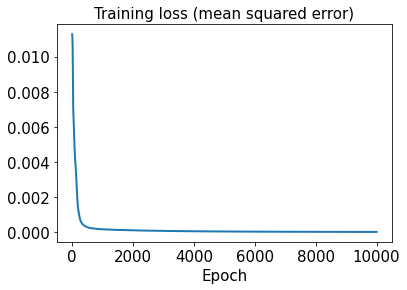

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

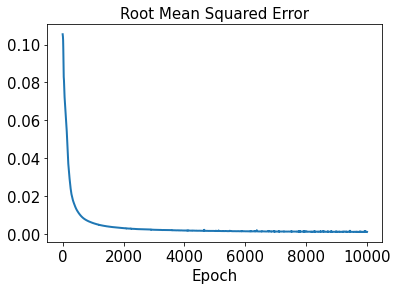

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

3/3 [==============================] - 0s 2ms/step - loss: 2.0240e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train_m2 = np.sum((sd.predict(x_train) - y_train)**2) / np.sum(y_train**2)
print(l2_error_train_m2)

7.775179e-05


In [54]:
l2_error_test_m2 = np.sum((sd.predict(x_test) - y_test)**2) / np.sum(y_test**2)
print(l2_error_test_m2)

0.027742844


In [55]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.000100292054


In [56]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.058595415


In [57]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00010002659, 7.6488395e-05, 0.00012380087, 0.00012536772, 6.0398015e-05, 6.1797575e-05, 0.00010222068, 0.00018003196, 9.8320044e-05, 8.35864e-05, 0.00013593161, 0.00010530197, 6.731962e-05, 0.00012283663, 7.327713e-05, 0.00010189871, 0.00036691275, 4.8522506e-05, 0.00017219692, 0.00015077673, 0.00018155955, 0.00010417557, 5.9901424e-05, 5.2384967e-05, 7.379306e-05, 0.00014518725, 9.349806e-05, 6.0087605e-05, 5.2266547e-05, 7.848006e-05, 4.120662e-05, 7.914727e-05, 8.342179e-05, 0.00011526724, 5.2375974e-05, 0.00019326269, 6.458977e-05, 0.0001827592, 8.3644416e-05, 9.95093e-05, 2.791038e-05, 9.066618e-05, 3.8182912e-05, 9.997826e-05, 0.00010690731, 8.437863e-05, 4.095985e-05, 0.00013747186, 0.0001651582, 7.685437e-05, 7.6599674e-05, 5.801738e-05, 1.6722744e-05, 7.413053e-05, 8.640619e-05, 0.00011102671, 0.00011144302, 5.3442753e-05, 0.0001542763, 7.7551056e-05, 8.301506e-05, 5.0026683e-05, 0.00010325471, 0.0002832167, 9.175175e-05, 0.00011383142, 8.624255e-05, 8.5602405e-05, 0.000142

In [58]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.009474024, 0.09107564, 0.006134414, 0.10811601, 0.005616075, 0.2156049, 0.003843507, 0.0049443333]


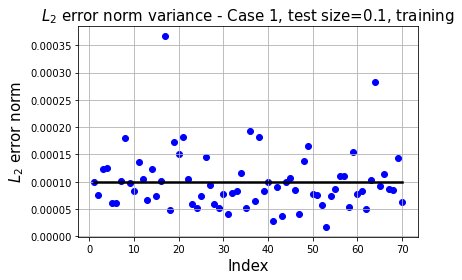

In [59]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

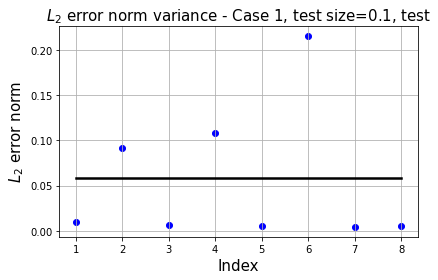

In [60]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

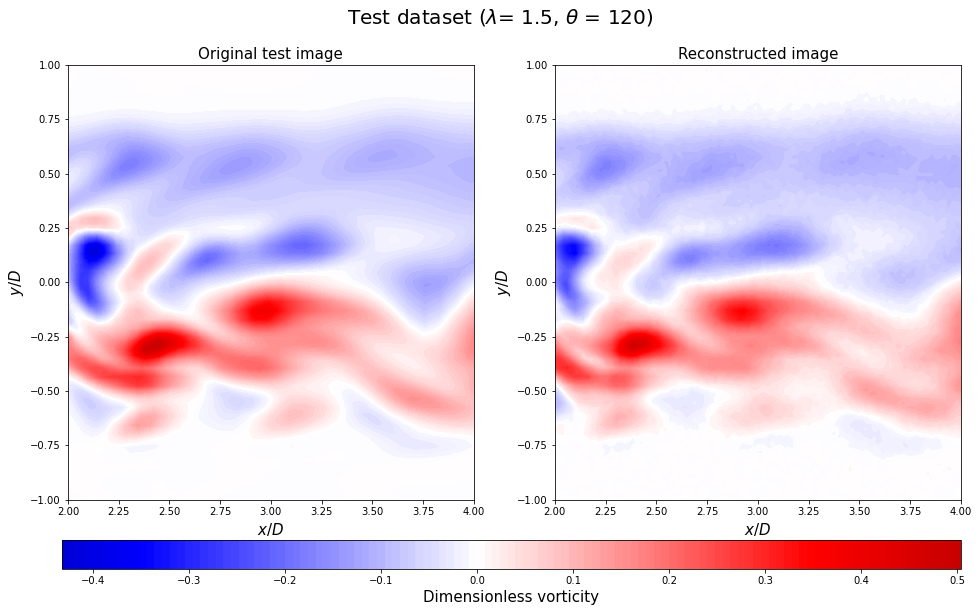

In [61]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

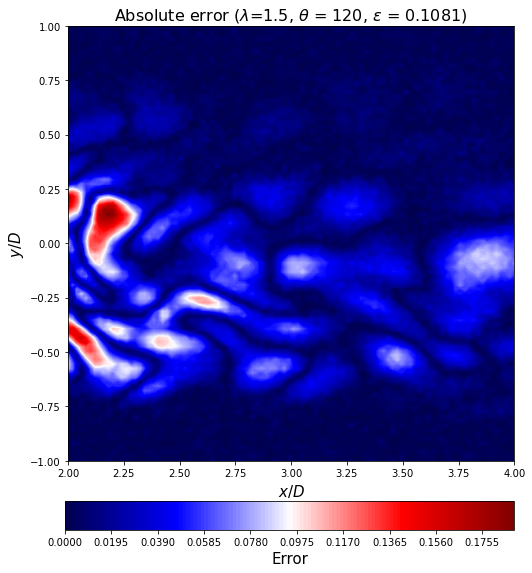

In [62]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()